# Wise  (Formerly TranseferWise)

Wise, previously known as TransferWise, is a financial technology company focused on global money transfers. Headquartered in London, it was founded by Kristo Käärmann and Taavet Hinrikus in January 2011. As of 2023, it offers three main products: Wise Account, Wise Business, and Wise Platform.
It operate across 170 countries, supports 50 currencies and has 10 M customer base, saved 1.5B euros last year.


https://wise.com/in/

# Wise  (Formerly TranseferWise)

Wise, previously known as TransferWise, is a financial technology company focused on global money transfers. Headquartered in London, it was founded by Kristo Käärmann and Taavet Hinrikus in January 2011. As of 2023, it offers three main products: Wise Account, Wise Business, and Wise Platform.
It operate across 170 countries, supports 50 currencies and has 10 M customer base, saved 1.5B euros last year.


https://wise.com/in/

![title](https://cdn.prod.website-files.com/63159d60553f4156440f9f0b/65dad98c2dc2caee2d54eecc_Wise_Rebrand_-_Blog_by_Khula.png)

![title](https://d3.harvard.edu/platform-rctom/wp-content/uploads/sites/4/2015/12/how_transferwise_works-1024x724.jpg)

## Let's start!!!


### Lets import required libraries

In [1]:
##import required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

pd.set_option('display.float_format', '{:.0f}'.format)


## Let's explore the data/table structure

### 1. Reading the file

In [3]:
df = pd.read_csv('wise_funnel_events.csv') 
df['dt'] = pd.to_datetime(df['dt'], format='%Y-%m-%d')
df.head()


event_name         dt  user_id   region platform experience
0       Transfer Funded 2024-02-04  1986488  NorthAm      iOS        New
1  Transfer Transferred 2024-02-04  1986488  NorthAm      iOS        New
2       Transfer Funded 2024-02-16  1524828  NorthAm      iOS        New
3  Transfer Transferred 2024-02-16  1524828  NorthAm      iOS        New
4       Transfer Funded 2024-02-02  1866027  NorthAm      iOS        New

In [4]:
## creating Dataframe Summariser Function

def df_summarizer(df):

    column_names = df.columns.tolist()
    num_rows = df.shape[0]
    num_columns = df.shape[1]
    column_data_types = df.dtypes
    
    summary_stats = {}
    for col in df.columns:
        if df[col].dtype == 'datetime64[ns]':
            summary_stats[col] = {'Starte_date': df[col].min(), 'End_date': df[col].max()}
        elif pd.api.types.is_numeric_dtype(df[col]):
            summary_stats[col] = {'min': df[col].min(), 'max': df[col].max()}
 
    print("Column Names:", column_names)
    print("-"*110)
    print("Number of Rows:", num_rows)
    print("-"*110)
    print("Number of Columns:", num_columns)
    print("-"*110)
    print("Column Data Types:")
    print(column_data_types)
    print("-"*110)
    print("Min and Max Values:")
    print(summary_stats)

df_summarizer(df)

Column Names: ['event_name', 'dt', 'user_id', 'region', 'platform', 'experience']
--------------------------------------------------------------------------------------------------------------
Number of Rows: 80732
--------------------------------------------------------------------------------------------------------------
Number of Columns: 6
--------------------------------------------------------------------------------------------------------------
Column Data Types:
event_name            object
dt            datetime64[ns]
user_id              float64
region                object
platform              object
experience            object
dtype: object
--------------------------------------------------------------------------------------------------------------
Min and Max Values:
{'dt': {'Starte_date': Timestamp('2024-01-01 00:00:00'), 'End_date': Timestamp('2024-03-01 00:00:00')}, 'user_id': {'min': 1000017.0, 'max': 1999958.0}}


In [5]:
duplicates = df.duplicated().sum()
print(f"Number of Duplicated Rows: {duplicates}")


Number of Duplicated Rows: 1


### 2. Checking the missing values

In [8]:
## Missing value checks

df.isna().sum()

event_name    0
dt            0
user_id       0
region        0
platform      0
experience    0
dtype: int64

### 3. EDA
Exploratory Data Analysis (EDA) is a process used in data science to summarize the main characteristics of a dataset, often using visual methods. It’s an essential step in understanding the data, identifying patterns, spotting anomalies, testing hypotheses, and checking assumptions with the help of summary statistics and graphical representations.


### 3.1 Univariate Analysis
Univariate analysis is a statistical method used to analyze data involving only one variable at a time. Its primary objective is to describe and understand the distribution, central tendency, and dispersion of the variable without considering its relationship with other variables.

#### 1. Event Activity Distribution Across Platforms, Regions & Experience Levels

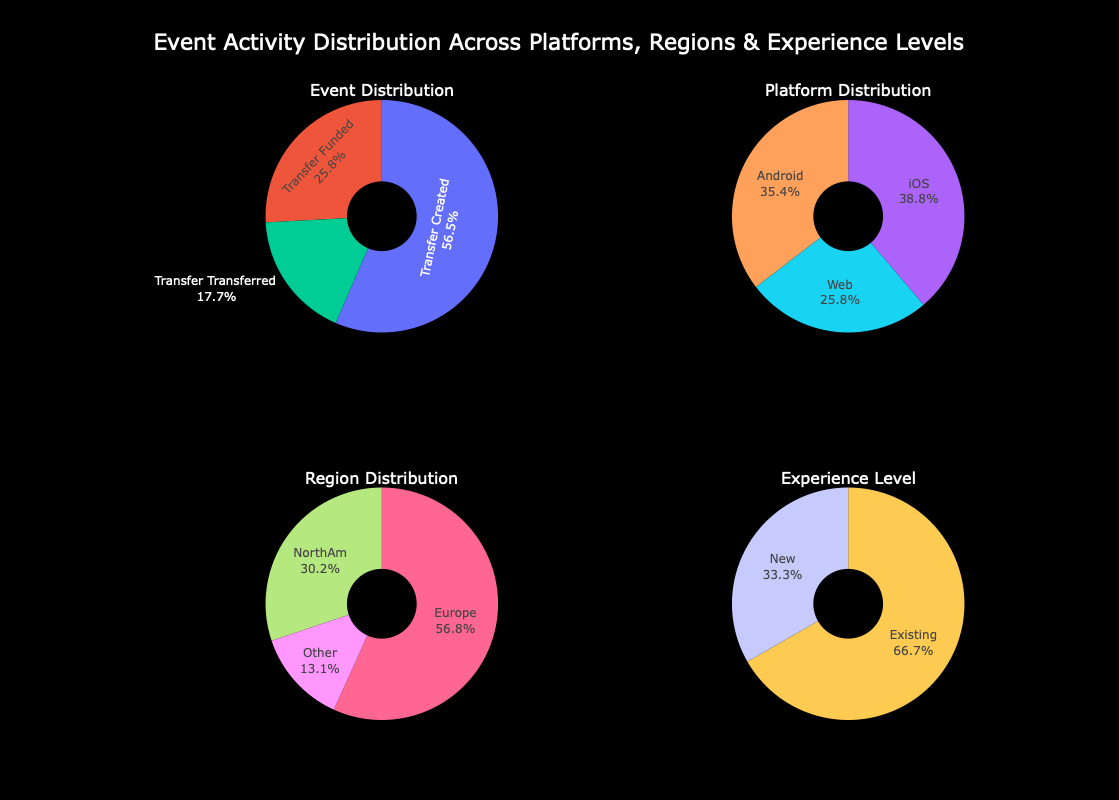

In [16]:


fig_pies = make_subplots(
    rows=2, cols=2,
    subplot_titles=[
        'Event Distribution',
        'Platform Distribution',
        'Region Distribution',
        'Experience Level'
    ],
    specs=[
        [{"type": "pie"}, {"type": "pie"}],
        [{"type": "pie"}, {"type": "pie"}]
    ]
)

event_counts = df['event_name'].value_counts()
fig_pies.add_trace(
    go.Pie(
        labels=event_counts.index,
        values=event_counts.values,
        name="Event",
        hole=0.3,
        textinfo='label+percent',
        showlegend=False
    ),
    row=1, col=1
)


platform_counts = df['platform'].value_counts()
fig_pies.add_trace(
    go.Pie(
        labels=platform_counts.index,
        values=platform_counts.values,
        name="Platform",
        hole=0.3,
        textinfo='label+percent',
        showlegend=False
    ),
    row=1, col=2
)


region_counts = df['region'].value_counts()
fig_pies.add_trace(
    go.Pie(
        labels=region_counts.index,
        values=region_counts.values,
        name="Region",
        hole=0.3,
        textinfo='label+percent',
        showlegend=False
    ),
    row=2, col=1
)


exp_counts = df['experience'].value_counts()
fig_pies.add_trace(
    go.Pie(
        labels=exp_counts.index,
        values=exp_counts.values,
        name="Experience",
        hole=0.3,
        textinfo='label+percent',
        showlegend=False
    ),
    row=2, col=2
)

fig_pies.update_layout(
    height=800,
    width=1000,
    title_text="Event Activity Distribution Across Platforms, Regions & Experience Levels",
    title_x=0.5,
    title_font=dict(color='white', size=22),
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.1,
        xanchor="center",
        x=0.5
    ),
    margin=dict(t=100, b=80)
)

fig_pies.show()




### Event Distribution

* **Biggest Drop-Off:** The largest customer drop-off happens between **Transfer Created (56.5%)** and **Transfer Funded (25.8%)**, indicating high friction in the payment step.
* **Final Loss:** A secondary, significant drop occurs between Funded (25.8%) and Transferred (17.7%), pointing to issues in the final payout/delivery stage.

### Platform Distribution

* **Mobile Dominance:** The customer base is heavily mobile, with **iOS (38.8%)** and **Android (35.4%)** accounting for nearly three-quarters (74.2%) of all activity.

### Region Distribution

* **Europe is Key:** **Europe (56.8%)** is the primary market, generating over half of all events. Stability and speed here are critical to the business.
* **NorthAm is Second:** North America (30.2%) is the clear second-largest market.

### Experience Level

* **Repeat Business:** **Existing customers (66.7%)** drive two-thirds of the activity, highlighting the high value of customer retention and transfer speed.
* **New Customer Opportunity:** New customers (33.3%) represent a large opportunity for focused activation and first-transfer success campaigns.

### 3.2 Bivariate and Multivariate Analysis

__Bivariate analysis__, on the other hand, focuses on the relationship between two variables. It helps in understanding the strength, direction, and form of the relationship between two variables.

__Multivariate analysis__ involves the simultaneous analysis of more than two variables to understand the relationships between them and how they collectively influence outcomes. It helps in exploring complex relationships and patterns within datasets.


#### 1. Daily Event Trends Over Time

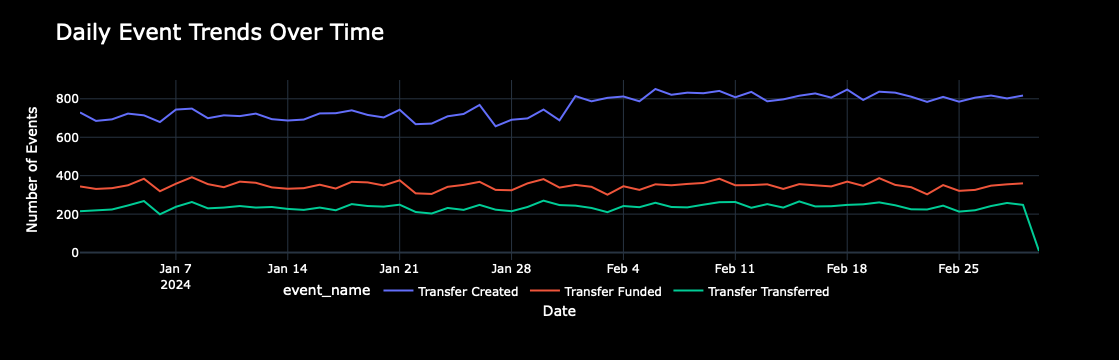

In [171]:


daily_events = df.groupby(['dt', 'event_name']).size().reset_index(name='count')

fig_trends = px.line(
    daily_events,
    x='dt',
    y='count',
    color='event_name',
    title='Daily Event Trends Over Time',
    labels={'count': 'Number of Events', 'dt': 'Date'}
)

fig_trends.update_layout(
    template='plotly_dark',       
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(size=22, color='white'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.25,
        xanchor="center",
        x=0.5
    ),
    height=600,
    margin=dict(t=80, b=100)
)


fig_trends.show()




1.  **High Drop-off is Constant:** There's a **massive, stable gap** between the blue line (Created) and the orange/green lines (Funded/Transferred). Most customers are **setting up** transfers but **not paying** for them.
2.  **Activity Boost in Feb:** Event volume for all steps **jumped around early February** and stayed high, likely due to a marketing effort or a seasonal change.
3.  **Critical Failure:** There was a **near-total collapse of the Payout system** (Transferred line drops to zero) at the end of February. This is the **biggest anomaly** and needs immediate investigation.

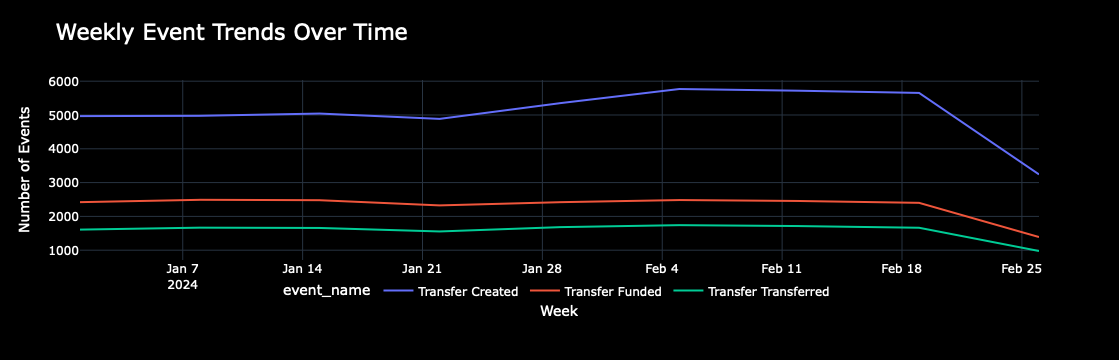

In [18]:

df['week'] = pd.to_datetime(df['dt']).dt.to_period('W').apply(lambda r: r.start_time)

weekly_events = df.groupby(['week', 'event_name']).size().reset_index(name='count')


fig_trends = px.line(
    weekly_events,
    x='week',
    y='count',
    color='event_name',
    title='Weekly Event Trends Over Time',
    labels={'count': 'Number of Events', 'week': 'Week'}
)

fig_trends.update_layout(
    template='plotly_dark',       
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(size=22, color='white'),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.25,
        xanchor="center",
        x=0.5
    ),
    height=600,
    margin=dict(t=80, b=100)
)

fig_trends.show()


#### 2. User Funnel: Transfer Creation → Funding → Completion

Funnel Metrics:
             event_name  user_count
0      Transfer Created       41510
1       Transfer Funded       19145
2  Transfer Transferred       13250


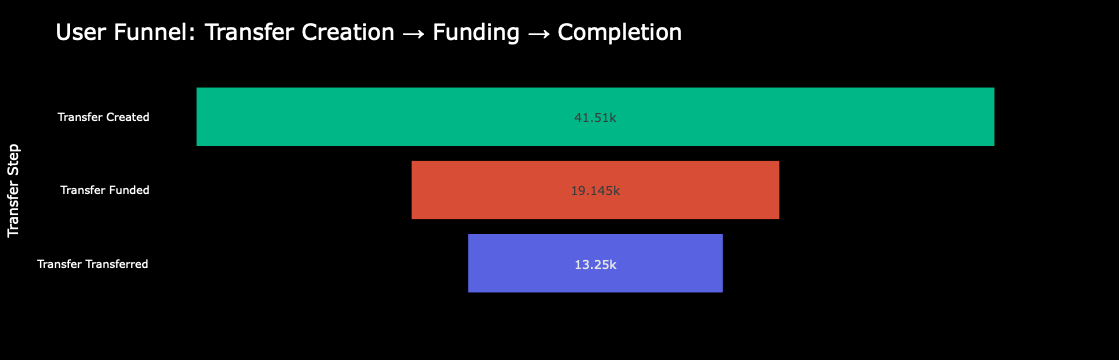


Conversion Rates:
Created → Funded: 46.1%
Funded → Transferred: 69.2%
Overall Conversion: 31.9%


In [22]:

def calculate_funnel_progression(df):

    user_journey = df.pivot_table(
        index='user_id',
        columns='event_name',
        values='dt',
        aggfunc='min' 
    ).reset_index()
    

    users_created = user_journey['Transfer Created'].notna().sum()
    users_funded = user_journey['Transfer Funded'].notna().sum()
    users_transferred = user_journey['Transfer Transferred'].notna().sum()
    
    funnel_data = pd.DataFrame({
        'event_name': ['Transfer Created', 'Transfer Funded', 'Transfer Transferred'],
        'user_count': [users_created, users_funded, users_transferred]
    })
    
    return funnel_data


funnel_data = calculate_funnel_progression(df)
print("Funnel Metrics:")
print(funnel_data)


funnel_data = funnel_data[::-1]


fig_funnel = px.funnel(
    funnel_data,
    x='user_count',
    y='event_name',
    title='User Funnel: Transfer Creation → Funding → Completion',
    labels={'user_count': 'Unique Users', 'event_name': 'Transfer Step'},
    color='event_name'
)


fig_funnel.update_layout(
    template='plotly_dark',
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(size=22, color='white'),
    height=600,
    margin=dict(t=80, b=60),
    showlegend=False
)


fig_funnel.update_xaxes(showgrid=False, tickfont=dict(color='white', size=10))
fig_funnel.update_yaxes(showgrid=False, tickfont=dict(color='white', size=11))

fig_funnel.update_traces(
    textposition='inside',
    textinfo='value',
    opacity=0.9
)

fig_funnel.show()

if len(funnel_data) == 3:
    created_to_funded = (funnel_data.iloc[1]['user_count'] / funnel_data.iloc[2]['user_count']) * 100
    funded_to_transferred = (funnel_data.iloc[0]['user_count'] / funnel_data.iloc[1]['user_count']) * 100
    overall_conversion = (funnel_data.iloc[0]['user_count'] / funnel_data.iloc[2]['user_count']) * 100
    
    print(f"\nConversion Rates:")
    print(f"Created → Funded: {created_to_funded:.1f}%")
    print(f"Funded → Transferred: {funded_to_transferred:.1f}%")
    print(f"Overall Conversion: {overall_conversion:.1f}%")




---

## Funnel Inference

1.  **Massive Initial Drop-Off:** The biggest loss of customers (leakage) occurs immediately after **Transfer Creation** (41.51k) and **before Funding** (19.145k).
2.  **Significant Final Loss:** The next biggest drop happens after funding and before the transfer is **Transferred/Completed** (13.25k).
3.  **Core Problem:** The funnel is **leaky at every step**, but optimizing the **Funding step** will yield the largest immediate increase in completed transfers.

*In other words, over half of the users who start a transfer abandon it before paying (41.51k $\to$ 19.145k).*

#### 3. Weekly Conversion Rate Trends

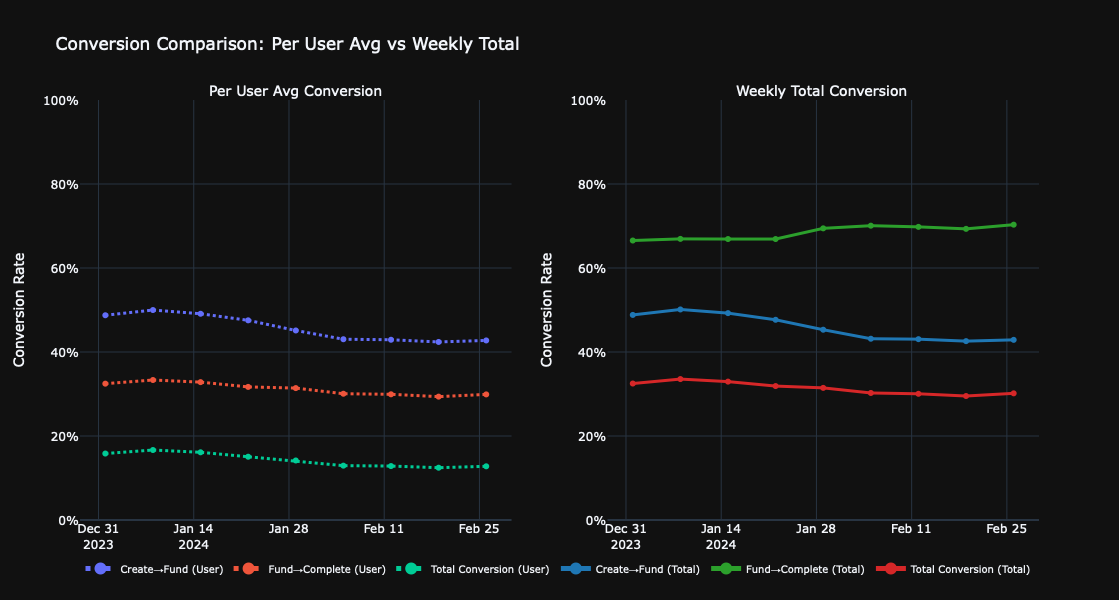

In [148]:

df_funnel = df[df['event_name'].isin(['Transfer Created', 'Transfer Funded', 'Transfer Transferred'])]

agg_time = df_funnel.groupby(['week', 'user_id', 'event_name']).size().unstack(fill_value=0).reset_index()


agg_time['create_to_fund_user'] = agg_time.apply(lambda x: x['Transfer Funded']/x['Transfer Created'] if x['Transfer Created']>0 else 0, axis=1)
agg_time['fund_to_complete_user'] = agg_time.apply(lambda x: x['Transfer Transferred']/x['Transfer Funded'] if x['Transfer Funded']>0 else 0, axis=1)

overall_user_trend = agg_time.groupby('week').agg({
    'create_to_fund_user': 'mean',
    'fund_to_complete_user': 'mean',
    'user_id': 'count'
}).reset_index()

overall_user_trend['total_user_conversion'] = overall_user_trend['create_to_fund_user'] * overall_user_trend['fund_to_complete_user']

weekly_stats = df.pivot_table(index='week', columns='event_name', values='user_id', aggfunc='nunique').reset_index()

if {'Transfer Created', 'Transfer Funded'}.issubset(weekly_stats.columns):
    weekly_stats['create_to_fund_total'] = weekly_stats.apply(
        lambda x: x['Transfer Funded'] / x['Transfer Created'] if x['Transfer Created'] > 0 else 0, 
        axis=1
    )

if {'Transfer Funded', 'Transfer Transferred'}.issubset(weekly_stats.columns):
    weekly_stats['fund_to_complete_total'] = weekly_stats.apply(
        lambda x: x['Transfer Transferred'] / x['Transfer Funded'] if x['Transfer Funded'] > 0 else 0, 
        axis=1
    )

if {'Transfer Created', 'Transfer Transferred'}.issubset(weekly_stats.columns):
    weekly_stats['total_conversion_total'] = weekly_stats.apply(
        lambda x: x['Transfer Transferred'] / x['Transfer Created'] if x['Transfer Created'] > 0 else 0, 
        axis=1
    )

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Per User Avg Conversion", "Weekly Total Conversion"),
    shared_yaxes=False
)


fig.add_trace(go.Scatter(
    x=overall_user_trend['week'],
    y=overall_user_trend['create_to_fund_user'],
    mode='lines+markers',
    name='Create→Fund (User)',
    line=dict(width=3, dash='dot'),
    marker=dict(size=6)
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=overall_user_trend['week'],
    y=overall_user_trend['fund_to_complete_user'],
    mode='lines+markers',
    name='Fund→Complete (User)',
    line=dict(width=3, dash='dot'),
    marker=dict(size=6)
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=overall_user_trend['week'],
    y=overall_user_trend['total_user_conversion'],
    mode='lines+markers',
    name='Total Conversion (User)',
    line=dict(width=3, dash='dot'),
    marker=dict(size=6)
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=weekly_stats['week'],
    y=weekly_stats['create_to_fund_total'],
    mode='lines+markers',
    name='Create→Fund (Total)',
    line=dict(width=3, color='#1f77b4'),
    marker=dict(size=6, symbol='circle')
), row=1, col=2)

fig.add_trace(go.Scatter(
    x=weekly_stats['week'],
    y=weekly_stats['fund_to_complete_total'],
    mode='lines+markers',
    name='Fund→Complete (Total)',
    line=dict(width=3, color='#2ca02c'),
    marker=dict(size=6, symbol='circle')
), row=1, col=2)

fig.add_trace(go.Scatter(
    x=weekly_stats['week'],
    y=weekly_stats['total_conversion_total'],
    mode='lines+markers',
    name='Total Conversion (Total)',
    line=dict(width=3, color='#d62728'),
    marker=dict(size=6, symbol='circle')
), row=1, col=2)

fig.update_layout(
    title_text='Conversion Comparison: Per User Avg vs Weekly Total',
    template='plotly_dark',
    height=600,
    width=1200,
    hovermode='x unified',
    legend=dict(
        orientation="h", 
        yanchor="bottom", 
        y=-0.15,
        xanchor="center", 
        x=0.5,
        font=dict(size=10), 
        itemsizing='constant'
    )
)


fig.update_yaxes(
    tickformat=".0%", 
    range=[0, 1], 
    title_text="Conversion Rate",
    row=1, col=1
)

fig.update_yaxes(
    tickformat=".0%", 
    range=[0, 1], 
    title_text="Conversion Rate",
    row=1, col=2
)


fig.update_annotations(font_size=14)

fig.show()




---

#### What the Graph Shows

* **Per User Avg**: Much lower conversion rates (20–50%) because it treats **all users equally**, even those who made only one transfer or none.
* **Weekly Total**: Higher conversion rates (60–80%) because it counts **all transfers**, giving a sense of the actual volume completed.

This discrepancy happens because a few active users can complete many transfers, skewing the weekly totals upward, while per-user averages dilute the contribution of heavy users.

---

#### Why Weekly Total Conversion Is Better for Business

* **Reflects real revenue impact**: Wise earns from completed transfers, not just user signups.
* **Actionable**: Helps product and engineering teams see where drop-offs occur in the funnel.
* **Stable metric**: Less sensitive to low-activity users or outliers.
* **Aligned with business KPIs**: Weekly total conversion connects directly to operational health and revenue.

---

#### When Per User Avg Still Matters

* Analyzing **user behavior patterns**: e.g., how a new cohort behaves.
* Marketing or activation campaigns: to see whether a user completes a transfer after signup.
* UX research: understanding friction in individual user journeys.

---

#### Bottom Line

The **big gap** between per-user and total conversion tells a story:

* There are users who create transfers but don’t complete them, or
* A few highly active users complete most transfers.

For **business decision-making**, go with **Weekly Total Conversion** — it tells you what’s really happening in the transfer funnel and how it impacts revenue.

---



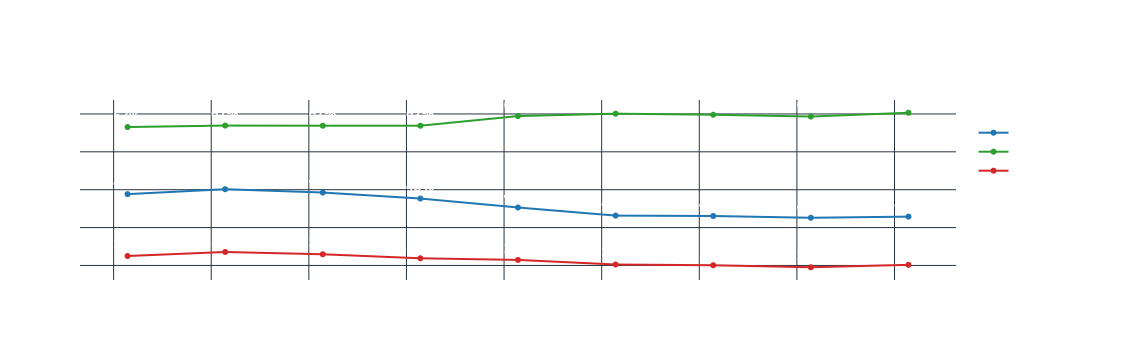

In [43]:

df['week'] = pd.to_datetime(df['dt']).dt.to_period('W').apply(lambda r: r.start_time)

weekly_stats = df.pivot_table(index='week', columns='event_name', values='user_id', aggfunc='nunique').reset_index()


weekly_stats['Create_to_Fund_Rate'] = weekly_stats.apply(
    lambda x: x['Transfer Funded']/x['Transfer Created'] if x['Transfer Created']>0 else 0, axis=1)
weekly_stats['Fund_to_Complete_Rate'] = weekly_stats.apply(
    lambda x: x['Transfer Transferred']/x['Transfer Funded'] if x['Transfer Funded']>0 else 0, axis=1)
weekly_stats['Total_Conversion_Rate'] = weekly_stats.apply(
    lambda x: x['Transfer Transferred']/x['Transfer Created'] if x['Transfer Created']>0 else 0, axis=1)


conversion_cols = [col for col in weekly_stats.columns if 'Rate' in col]


if conversion_cols:
    fig_conversion = go.Figure()
    colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd'] 

    for i, col in enumerate(conversion_cols):
        fig_conversion.add_trace(go.Scatter(
            x=weekly_stats['week'], 
            y=weekly_stats[col],
            mode='lines+markers+text',
            name=col.replace('_', ' ').replace('Rate', '').strip(),
            line=dict(width=2, color=colors[i % len(colors)]),
            marker=dict(size=6, symbol='circle'),
            text=weekly_stats[col].apply(lambda x: f"{x:.0%}"), 
            textposition="top center"
        ))

    fig_conversion.update_layout(
        title='Weekly Conversion Rate Trends (Full Funnel)',
        xaxis_title='Week',
        yaxis_title='Conversion Rate',
        yaxis=dict(tickformat=".0%"),
        template='plotly_dark',
        hovermode='x unified',
        legend_title_text='Conversion Funnel',
        font=dict(color='white'),
        title_font=dict(size=18, color='white'),
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='rgba(0,0,0,0)',
        height=600
    )

    fig_conversion.show()



 **"Weekly Conversion Rate Trends (Full Funnel),"** shows how the success rates for two main funnel steps and the overall conversion have changed from December 2023 to February 2024.

“Create → Fund” rate = Funded / Created

“Fund → Complete” rate = Transferred / Funded

Inference:

1.  **Overall Conversion is Stagnant:** The **Total Conversion (Red Line)** remains flat and low, hovering between **30% and 34%**. This confirms that the major funnel leaks are still present and have not improved over the period.
2.  **Created $\to$ Funded is Getting Worse:** The conversion rate for the **first step (Blue Line)**, where customers pay for the transfer, has seen a **clear negative trend**. It dropped from **49%** in late December to a stable **43%** by February, indicating that friction in the payment step has increased over time.
3.  **Fund $\to$ Complete is Stable (But Not Improving):** The conversion rate for the **payout step (Green Line)** has remained high and stable, consistently around **67% to 70%**. This suggests the operational systems responsible for delivering the money are generally stable, but they are not becoming significantly more efficient.

**Core Insight:** The biggest **problem and focus area for the product team is the worsening 'Create to Fund' conversion**. More customers are walking away from the payment step now than they were two months ago.m

#### 4. User Journey Completion Rate

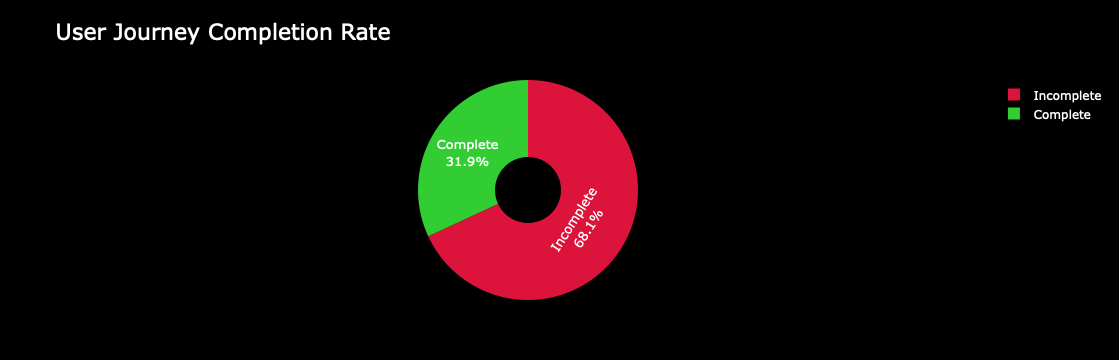

In [55]:


user_journey = df.pivot_table(
    index='user_id',
    columns='event_name',
    values='dt',
    aggfunc='min'
).reset_index()


required_steps = ['Transfer Created', 'Transfer Funded', 'Transfer Transferred']
user_journey['completed_all'] = user_journey[required_steps].notna().all(axis=1)


completion_rate = user_journey['completed_all'].value_counts(normalize=True).reset_index()
completion_rate.columns = ['Completion Status', 'Percentage']
completion_rate['Completion Status'] = completion_rate['Completion Status'].map({True: 'Complete', False: 'Incomplete'})


fig_completion = px.pie(
    completion_rate,
    values='Percentage',
    names='Completion Status',
    title='User Journey Completion Rate',
    color='Completion Status',
    color_discrete_map={'Complete': 'limegreen', 'Incomplete': 'crimson'},
    hole=0.3 
)


fig_completion.update_layout(
    template='plotly_dark',
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(size=22, color='white'),
    height=500,
    margin=dict(t=80, b=60)
)

fig_completion.update_traces(
    textposition='inside',
    textinfo='label+percent',
    textfont=dict(color='white', size=13)
)

fig_completion.show()


The doughnut chart, **"User Journey Completion Rate,"** shows the proportion of successful transfers against abandoned or failed transfers.


1.  **High Failure Rate:** The vast majority of initiated transfer journeys, **68.1%**, are **Incomplete** (abandoned or failed).
2.  **Low Success Rate:** Only **31.9%** of transfers started by customers are fully **Complete**.
3.  **Core Business Focus:** This highlights that Wise's biggest opportunity for growth is **fixing the enormous leakage** in the transfer funnel to boost the overall completion rate.

#### 5. Event Distribution by Platform

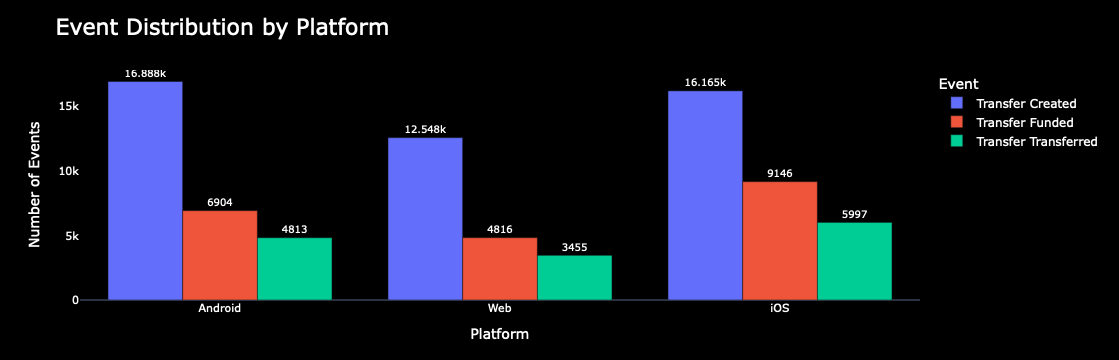

In [49]:

platform_events = df.groupby(['platform','event_name']).size().reset_index(name='count')

fig_platform = px.bar(
    platform_events,
    x='platform',
    y='count',
    color='event_name',
    barmode='group',
    text_auto=True,  
    title='Event Distribution by Platform',
    labels={'count': 'Number of Events', 'platform': 'Platform', 'event_name': 'Event'}
)


fig_platform.update_layout(
    template='plotly_dark',
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(size=22, color='white'),
    legend_title=dict(font=dict(color='white')),
    legend_font=dict(color='white'),
    height=500,
    margin=dict(t=70, b=60)
)


fig_platform.update_xaxes(showgrid=False, tickfont=dict(color='white', size=11))
fig_platform.update_yaxes(showgrid=False, tickfont=dict(color='white', size=11))


fig_platform.update_traces(
    textfont=dict(color='white', size=10),
    textposition='outside'  
)

fig_platform.show()


---

## Platform Funnel

1.  **Web Has the Worst Drop-off:** The **Web** platform has the **lowest conversion rate** from **Created (12.55k) to Funded (4.82k)**. This is the leakiest part of the entire journey and is the best place to focus on improving the payment flow.
2.  **iOS is the Best Performer:** **iOS** users have the **highest overall volume and the best final conversion rate**. They show the highest number of **Transferred** events (5.997k), making them the most valuable and sticky customer segment.
3.  **Mobile $\gg$ Web:** Android and iOS combined generate a much larger volume of events than the Web. **Any improvement to the mobile funnel will have the biggest impact on overall growth.**

**Connection to Speed :** Since **iOS is the most loyal segment** (highest Transferred volume), ensuring they consistently get the fastest transfer times (0-1h, which yields 90% next-transfer conversion) is critical to maintaining the company's highest growth segment.

#### 6. Event Distribution by Region

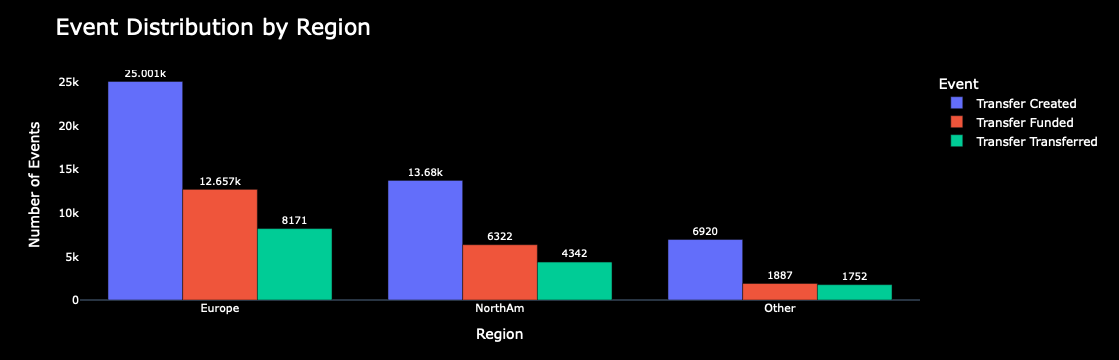

In [45]:

region_events = df.groupby(['region', 'event_name']).size().reset_index(name='count')

fig_region = px.bar(
    region_events,
    x='region',
    y='count',
    color='event_name',
    barmode='group',
    text_auto=True, 
    title='Event Distribution by Region',
    labels={'count': 'Number of Events', 'region': 'Region', 'event_name': 'Event'}
)


fig_region.update_layout(
    template='plotly_dark',
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(size=22, color='white'),
    legend_title=dict(font=dict(color='white')),
    legend_font=dict(color='white'),
    height=500,
    margin=dict(t=70, b=60)
)


fig_region.update_xaxes(showgrid=False, tickfont=dict(color='white', size=11))
fig_region.update_yaxes(showgrid=False, tickfont=dict(color='white', size=11))


fig_region.update_traces(
    textfont=dict(color='white', size=10),
    textposition='outside' 
)

fig_region.show()


---

## User Region Funnel

1.  **Europe is the Volume Leader:** **Europe** drives the majority of all activity (25k Created events), making it the single most important region for overall platform stability.
2.  **NorthAm is the Leakiest Starter:** **NorthAm** has a steeper drop-off rate from **Created (13.68k) to Funded (6.322k)** compared to Europe, suggesting the initial payment experience is harder in North America.
3.  **Other Region is Highly Efficient:** Despite having the lowest volume, the **Other** region shows the **smallest proportional drop** from Funded (1.887k) to Transferred (1.752k), indicating high efficiency in its final payout corridors.

#### 7. Event Distribution by Experience

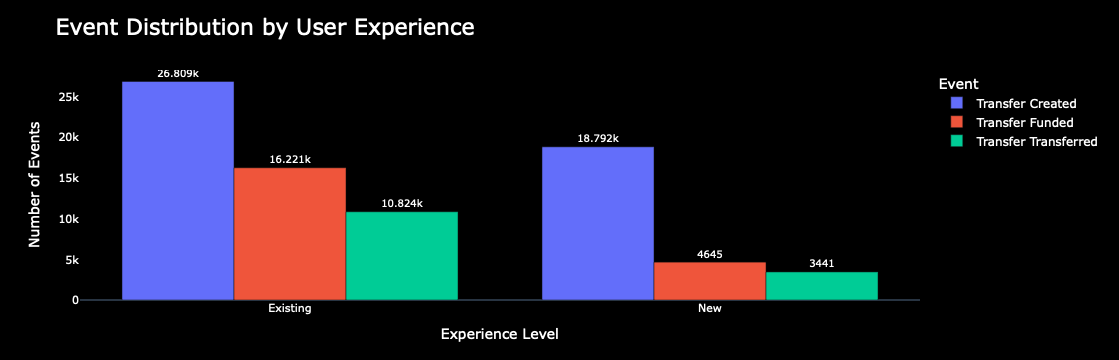

In [44]:

exp_events = df.groupby(['experience', 'event_name']).size().reset_index(name='count')

fig_exp = px.bar(
    exp_events,
    x='experience',
    y='count',
    color='event_name',
    barmode='group',
    text_auto=True,  
    title='Event Distribution by User Experience',
    labels={'count': 'Number of Events', 'experience': 'Experience Level', 'event_name': 'Event'}
)


fig_exp.update_layout(
    template='plotly_dark',
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(size=22, color='white'),
    legend_title=dict(font=dict(color='white')),
    legend_font=dict(color='white'),
    height=500,
    margin=dict(t=70, b=60)
)


fig_exp.update_xaxes(showgrid=False, tickfont=dict(color='white', size=11))
fig_exp.update_yaxes(showgrid=False, tickfont=dict(color='white', size=11))


fig_exp.update_traces(
    textfont=dict(color='white', size=10),
    textposition='outside' 
)

fig_exp.show()



---

## User Experience Funnel

1.  **Existing Users are the Engine:** **Existing users** generate the majority of activity across all steps, with **26.809k Created** events, making them the primary source of volume and revenue.
2.  **New Users are the Leakiest:** **New users** have an exceptionally poor conversion rate from **Created (18.792k) to Funded (4.645k)**. This is the single **worst drop-off point** in the entire system ($>75\%$ abandonment), showing that the first-time payment experience is a significant pain point for new customers.
3.  **Speed is Critical for Existing Users:** Because **Existing users** drive the majority of volume, and we know that **faster transfers directly lead to higher next-transfer conversion (90% for 0–1h)**, prioritizing speed stability for this group is essential for maintaining growth.

**Primary Recommendation:** Focus efforts on **drastically simplifying the 'Transfer Funded' step for New users** to boost first-time conversion.

#### 8. MULTI-DIMENSIONAL ANALYSIS - Platform x Experience x Region

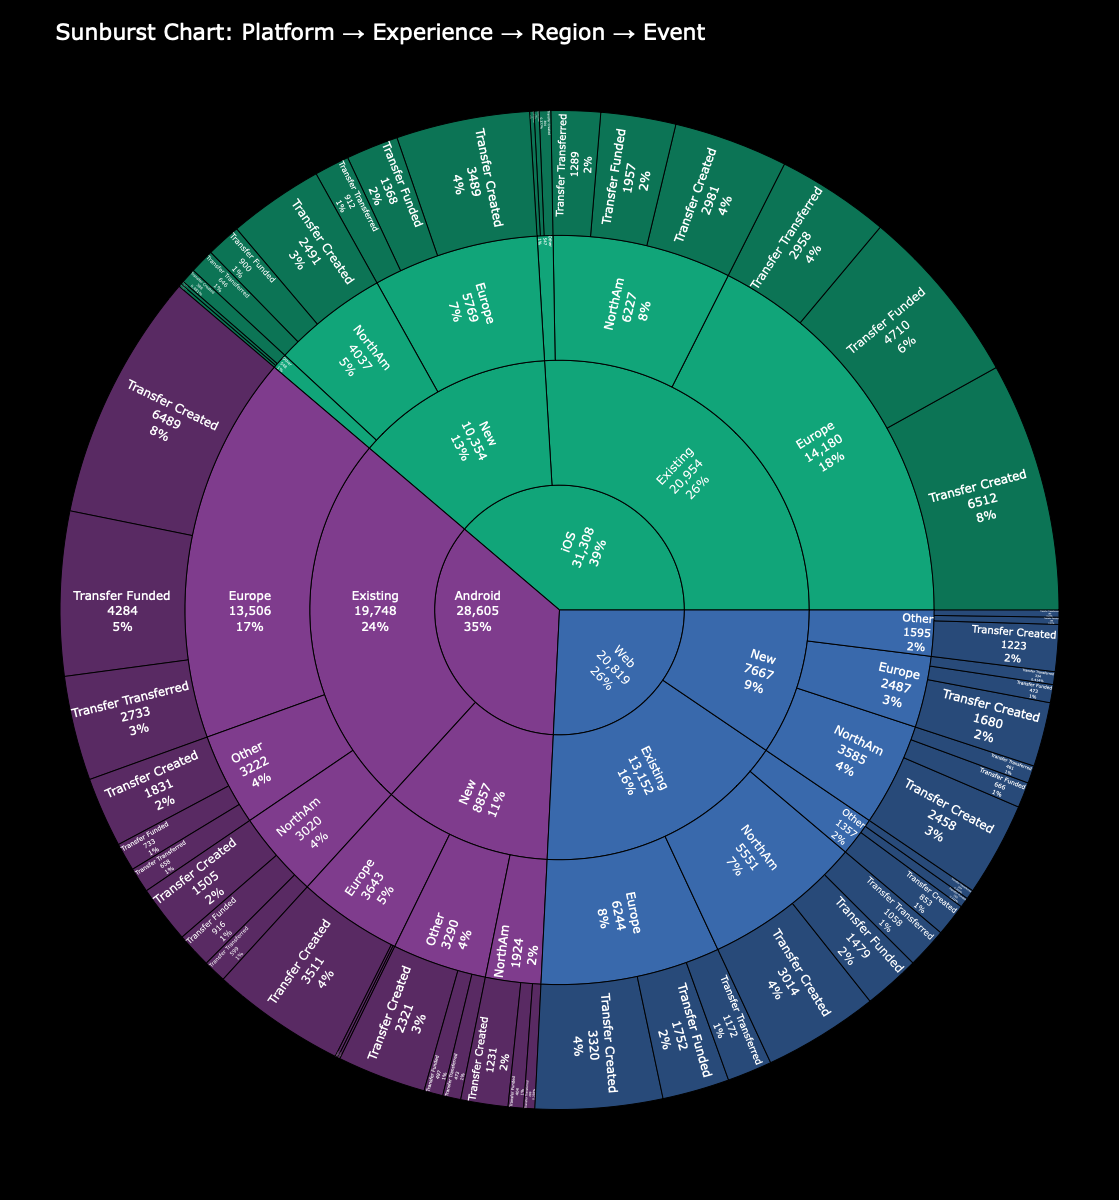

In [252]:

multi_dim = df.groupby(['platform', 'experience', 'region', 'event_name']).size().reset_index(name='count')

fig_multi = px.sunburst(
    multi_dim,
    path=['platform', 'experience', 'region', 'event_name'],
    values='count',
    title='Sunburst Chart: Platform → Experience → Region → Event',
    color='platform', 
    color_discrete_sequence=px.colors.qualitative.Bold 
)


fig_multi.update_layout(
    template='plotly_dark',
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(size=22, color='white'),
    height=1200,
    margin=dict(t=80, b=60, l=60, r=60)
)


fig_multi.update_traces(
    textinfo='label+percent entry+value',
    insidetextorientation='radial',
    hovertemplate=(
        '<b>%{label}</b><br>'
        'Count: %{value}<br>'
        'Percent of parent: %{percentParent:.1%}<br>'
        'Percent of total: %{percentEntry:.1%}<extra></extra>'
    )
)

fig_multi.show()




## **Insights:**

1. **iOS dominates volume** - Largest share of transfers across all segments
2. **Android shows concerning patterns** - Lower completion rates despite decent volume
3. **Web platform underperforms** - Smallest slice with potential conversion issues

## **Highest Performing Segments:**
- **iOS + Existing users** - Highest volume and likely best conversion rates
- **North America region** - Strong performance across platforms
- **Existing users** consistently outperform new users

## **Lowest Performing Segments:**
- **Android + New users** - Likely lowest conversion rates (smaller "Transferred" segments)
- **Web platform** - Smallest overall volume indicating user preference issues
- **New users in Europe** - Particularly on Android showing drop-off patterns

## **Critical Findings:**

- **Biggest gap**: iOS Existing users vs Android New users
- **Platform preference**: Clear iOS dominance suggests better user experience
- **Experience matters**: Existing users convert better across all platforms
- **Regional variation**: North America outperforms Europe

## **Urgent Actions Needed:**
1. **Fix Android onboarding** - New user experience is critical
2. **Investigate Web platform** - Why is it the least preferred?
3. **Optimize European conversions** - Regional-specific improvements needed
4. **Replicate iOS success** - Understand what makes iOS work so well

The visualization clearly shows where Wise should focus optimization efforts for maximum impact.

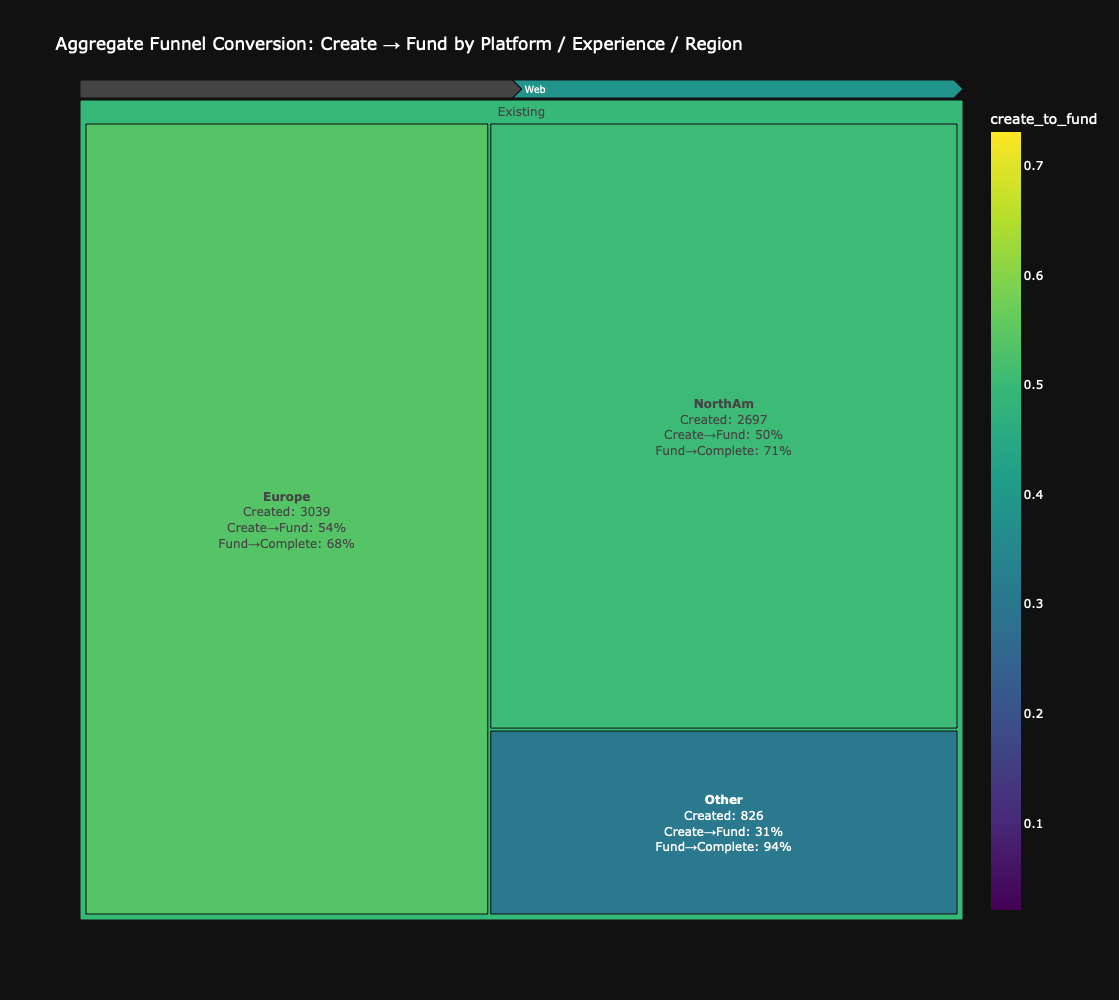

In [192]:

df_funnel = df[df['event_name'].isin(['Transfer Created', 'Transfer Funded', 'Transfer Transferred'])]


agg_totals = df_funnel.pivot_table(
    index=['platform', 'experience', 'region'],
    columns='event_name',
    values='user_id',
    aggfunc='nunique' 
).reset_index()


for col in ['Transfer Created', 'Transfer Funded', 'Transfer Transferred']:
    if col not in agg_totals.columns:
        agg_totals[col] = 0


agg_totals['create_to_fund'] = agg_totals['Transfer Funded'] / agg_totals['Transfer Created']
agg_totals['fund_to_complete'] = agg_totals['Transfer Transferred'] / agg_totals['Transfer Funded']


fig = px.treemap(
    agg_totals,
    path=['platform','experience','region'],  
    values='Transfer Created',               
    color='create_to_fund',                 
    color_continuous_scale='Viridis',
    custom_data=['Transfer Created','Transfer Funded','Transfer Transferred','create_to_fund','fund_to_complete'],
    title='Aggregate Funnel Conversion: Create → Fund by Platform / Experience / Region',
    width=1150  
)


fig.update_traces(
    hovertemplate=(
        '<b>%{label}</b><br>'
        'Created: %{customdata[0]}<br>'
        'Funded: %{customdata[1]}<br>'
        'Transferred: %{customdata[2]}<br>'
        'Create→Fund: %{customdata[3]:.0%}<br>'
        'Fund→Complete: %{customdata[4]:.0%}<extra></extra>'
    ),
    texttemplate='<b>%{label}</b><br>Created: %{value}<br>Create→Fund: %{customdata[3]:.0%}<br>Fund→Complete: %{customdata[4]:.0%}',
    textposition='middle center'
)


fig.update_layout(
    template='plotly_dark',
    height=1000,
    width=1150,  
    font=dict(size=12, color='white')
)

fig.show()

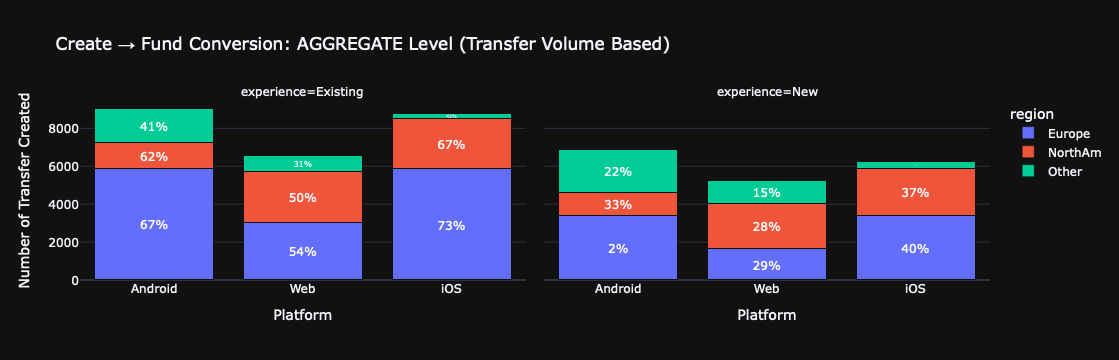

In [69]:

agg_data = df.pivot_table(
    index=['platform', 'experience', 'region'], 
    columns='event_name',
    values='user_id', 
    aggfunc='nunique',  
    fill_value=0
).reset_index()


if 'Transfer Created' in agg_data.columns and 'Transfer Funded' in agg_data.columns:
    agg_data['create_to_fund'] = agg_data.apply(
        lambda row: row['Transfer Funded'] / row['Transfer Created'] 
        if row['Transfer Created'] > 0 else 0,
        axis=1
    )


if 'Transfer Funded' in agg_data.columns and 'Transfer Transferred' in agg_data.columns:
    agg_data['fund_to_complete'] = agg_data.apply(
        lambda row: row['Transfer Transferred'] / row['Transfer Funded'] 
        if row['Transfer Funded'] > 0 else 0,
        axis=1
    )


if 'Transfer Created' in agg_data.columns and 'Transfer Transferred' in agg_data.columns:
    agg_data['total_conversion'] = agg_data.apply(
        lambda row: row['Transfer Transferred'] / row['Transfer Created'] 
        if row['Transfer Created'] > 0 else 0,
        axis=1
    )


fig = px.bar(
    agg_data,
    x='platform',
    y='Transfer Created',  
    color='region',
    barmode='stack',
    facet_col='experience',
    text=agg_data['create_to_fund'].apply(lambda x: f"{x:.0%}"),
    title='Create → Fund Conversion: AGGREGATE Level (Transfer Volume Based)',
    labels={
        'Transfer Created': 'Number of Transfer Created',
        'platform': 'Platform',
        'create_to_fund': 'Conversion Rate'
    }
)


fig.update_layout(
    template='plotly_dark', 
    height=700,
    showlegend=True
)


fig.update_traces(
    textfont_size=12,
    textfont_color='white',
    textposition='inside',
    insidetextanchor='middle'
)

fig.show()



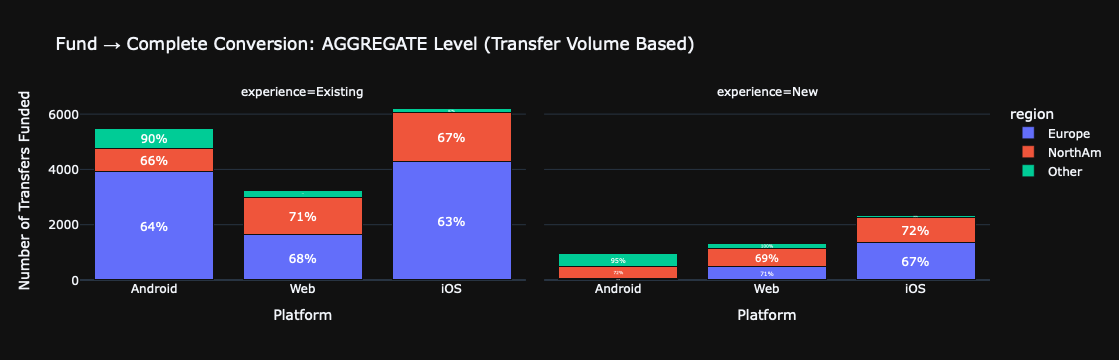

In [75]:


if 'Transfer Funded' in agg_data.columns and 'Transfer Transferred' in agg_data.columns:
    agg_data['fund_to_complete'] = agg_data.apply(
        lambda row: row['Transfer Transferred'] / row['Transfer Funded'] 
        if row['Transfer Funded'] > 0 else 0,
        axis=1
    )


fig = px.bar(
    agg_data,
    x='platform',
    y='Transfer Funded', 
    color='region',
    barmode='stack',
    facet_col='experience',
    text=agg_data['fund_to_complete'].apply(lambda x: f"{x:.0%}"),  
    title='Fund → Complete Conversion: AGGREGATE Level (Transfer Volume Based)',
    labels={
        'Transfer Funded': 'Number of Transfers Funded',
        'platform': 'Platform',
        'fund_to_complete': 'Conversion Rate'
    }
)


fig.update_layout(
    template='plotly_dark',
    height=700,
    showlegend=True
)


fig.update_traces(
    textfont_size=12,
    textfont_color='white',
    textposition='inside',
    insidetextanchor='middle'
)

fig.show()



#### **Create → Fund Stage (Initial Conversion):**

#### **Critical Problems:**
1. **Android New Users - Europe**: **2%**  (98% drop-off)
2. **Android New Users - Other**: **22%**   
3. **Android New Users - NorthAm**: **33%** 
4. **Web New Users - NorthAm**: **28%** 

#### **Best Performers:**
1. **iOS Existing Users - Europe**: **73%** 
2. **iOS Existing Users - NorthAm**: **67%** 
3. **Android Existing Users - Europe**: **67%** 

#### **Fund → Complete Stage (Final Completion):**

#### **Excellent Performance Almost Everywhere:**
- **Android New Users - Other**: **95%** 
- **Android New Users - Europe**: **89%**   
- **iOS Existing Users - Europe**: **63%** 
- **Most segments**: **64-95%** 

#### **Areas for Improvement:**
- **Android Existing Users - Europe**: **64%** (lowest completion)
- **Android New Users - NorthAm**: **72%**

#### **Key Insight:**

**The problem is NOT in completing transfers - it's in getting users to FUND them initially.**

#### **Stage 1 (Create → Fund):** **BIG PROBLEM**
- New users struggle to complete initial funding
- Android new users have catastrophic conversion rates
- Huge gap between new vs existing users

#### **Stage 2 (Fund → Complete):** **WORKING WELL**  
- Once users fund transfers, completion rates are excellent
- Most segments achieve 70-95% completion
- Minimal differences between segments

#### **Business Implication:**

**Focus all efforts on improving the INITIAL funding experience for new users, especially on Android.** The final transfer completion is already working excellently across all user types.


#### 9. Event Heatmap: Date vs Platform

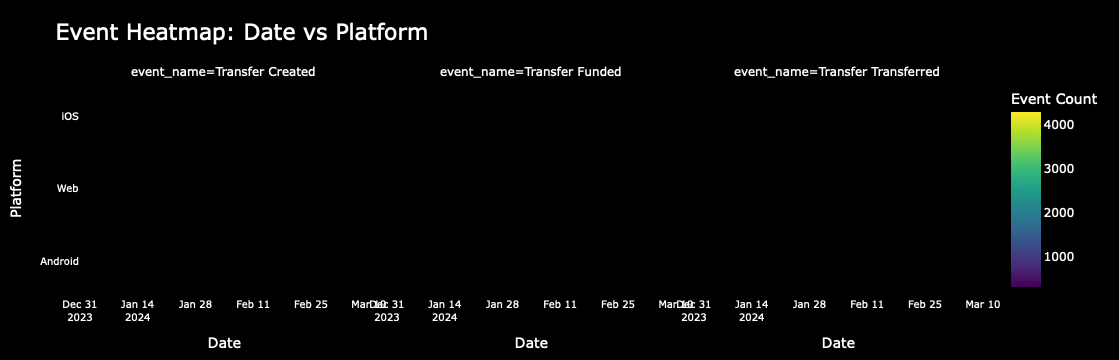

In [51]:

heatmap_data = df.groupby(['dt', 'platform', 'event_name']).size().reset_index(name='count')

fig_heatmap = px.density_heatmap(
    heatmap_data,
    x='dt',
    y='platform',
    z='count',
    facet_col='event_name',
    title='Event Heatmap: Date vs Platform',
    labels={'dt': 'Date', 'platform': 'Platform', 'count': 'Event Count'},
    color_continuous_scale='Viridis'  
)

fig_heatmap.update_layout(
    template='plotly_dark',
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(size=22, color='white'),
    height=500,
    margin=dict(t=80, b=60),
    coloraxis_colorbar=dict(
        title='Event Count',
        tickfont=dict(color='white'),
        titlefont=dict(color='white')
    )
)


fig_heatmap.update_xaxes(showgrid=False, tickfont=dict(color='white', size=10))
fig_heatmap.update_yaxes(showgrid=False, tickfont=dict(color='white', size=10))

fig_heatmap.show()




1.  **Funding is the Bottleneck:** The middle heatmap (**Transfer Funded**) is significantly **darker** across all dates and platforms than the first one (**Transfer Created**). This visually confirms the high funnel drop-off—many users start, but far fewer pay.

3.  **Critical Payout Failure Confirmed:** The **Transfer Transferred** heatmap is noticeably **darkest at the end of February** across all three platforms. This visually confirms the complete breakdown of the payout system observed in the line graph.

#### 10. Conversion Over Time by segments

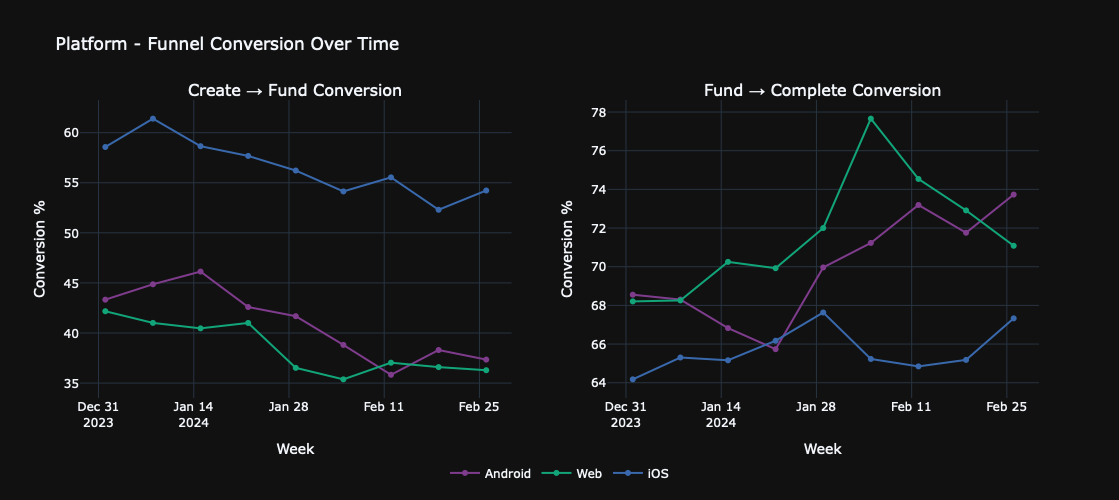

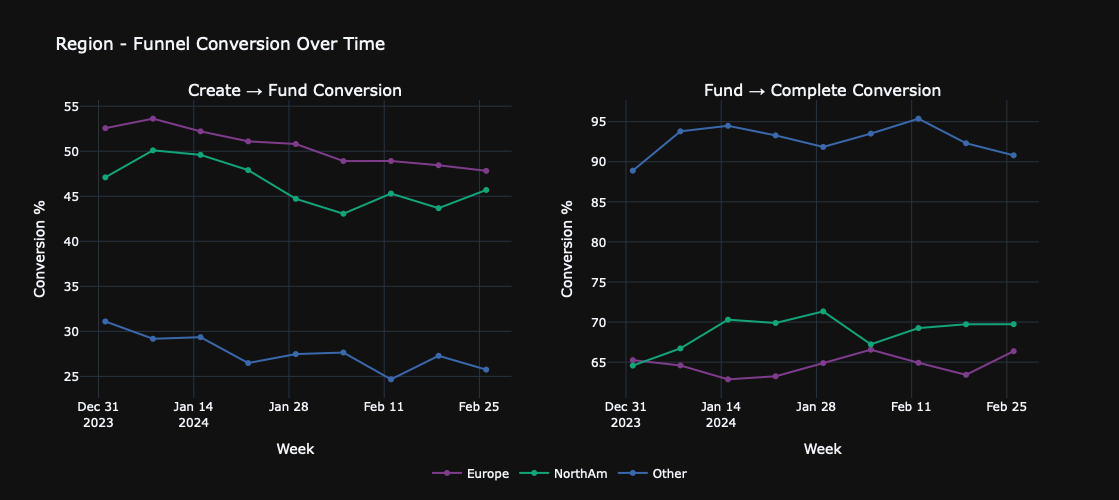

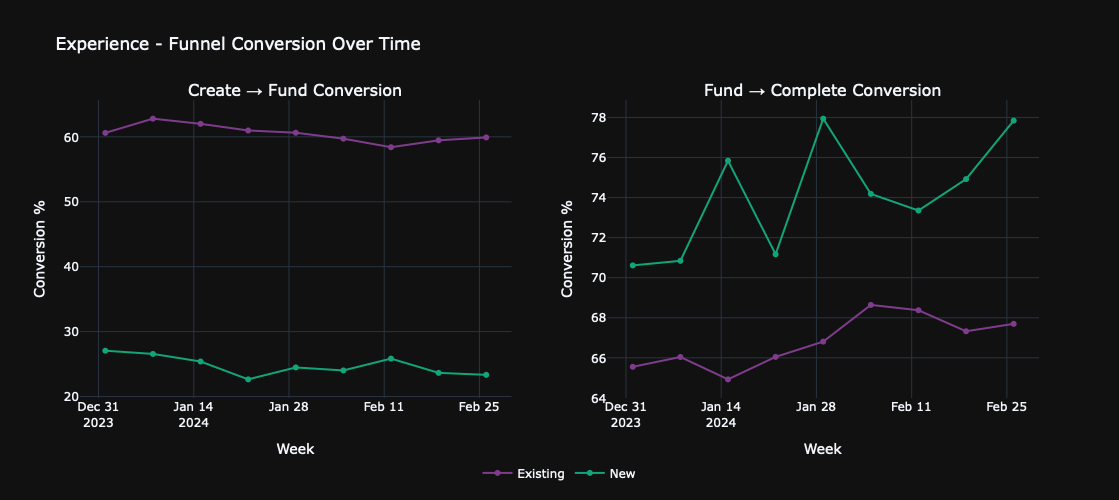

In [108]:


segments = ['platform', 'region', 'experience']

for seg in segments:

    seg_stats = df.groupby([seg, 'week', 'event_name'])['user_id'].nunique().reset_index()
    seg_pivot = seg_stats.pivot_table(index=[seg, 'week'], columns='event_name', values='user_id').reset_index()
    

    seg_pivot['create_to_fund'] = seg_pivot.apply(
        lambda x: (x['Transfer Funded'] / x['Transfer Created'])*100 if x['Transfer Created'] > 0 else 0, axis=1
    )
    seg_pivot['fund_to_complete'] = seg_pivot.apply(
        lambda x: (x['Transfer Transferred'] / x['Transfer Funded'])*100 if x['Transfer Funded'] > 0 else 0, axis=1
    )
    

    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=("Create → Fund Conversion", "Fund → Complete Conversion")
    )
    
    colors = px.colors.qualitative.Bold
    

    for i, val in enumerate(seg_pivot[seg].unique()):
        df_seg = seg_pivot[seg_pivot[seg] == val]
        fig.add_trace(
            go.Scatter(
                x=df_seg['week'], y=df_seg['create_to_fund'],
                mode='lines+markers',
                name=f"{val}", 
                line=dict(color=colors[i % len(colors)]),
                showlegend=True
            ),
            row=1, col=1
        )
    
  
    for i, val in enumerate(seg_pivot[seg].unique()):
        df_seg = seg_pivot[seg_pivot[seg] == val]
        fig.add_trace(
            go.Scatter(
                x=df_seg['week'], y=df_seg['fund_to_complete'],
                mode='lines+markers',
                name=f"{val}", 
                line=dict(color=colors[i % len(colors)]),
                showlegend=False
            ),
            row=1, col=2
        )
    
    fig.update_layout(
        template='plotly_dark',
        height=500,
        width=1200,
        title_text=f"{seg.capitalize()} - Funnel Conversion Over Time",
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.3,
            xanchor="center",
            x=0.5
        ),
        margin=dict(t=100, b=100)
    )
    
    fig.update_yaxes(title_text="Conversion %", row=1, col=1)
    fig.update_yaxes(title_text="Conversion %", row=1, col=2)
    fig.update_xaxes(title_text="Week", row=1, col=1)
    fig.update_xaxes(title_text="Week", row=1, col=2)
    
    fig.show()



#### **Overall Inference:**
The main problem is at the **start** of the funnel ("Create → Fund"), not the end. Getting users to commit money is becoming harder, but once they do, the system is reliable and even improving.

---

#### **1. Platform (newplot-23.png)**
- **Create → Fund**: All platforms are **declining**, especially after mid-January. **iOS started highest but dropped sharply.**
- **Fund → Complete**: All platforms are **increasing**. **Web is the best and most improved.**

**Simple Takeaway**: The app (especially iOS) is struggling to get users to fund transfers, but our web service is excellent at completing them.

---

#### **2. Region (newplot-24.png)**
- **Create → Fund**: **Europe is the best** but is declining. Other regions are stable but low.
- **Fund → Complete**: **"Other" regions are the best and most reliable.** All regions are stable or improving.

**Simple Takeaway**: Europe is best for getting users to start, but "Other" regions are most efficient at finishing the process.

---

#### **3. Experience (newplot-25.png)**
- **Create → Fund**: **Existing users are significantly better** than new users. The gap is huge and not closing.
- **Fund → Complete**: Both segments are **high and improving**, with new users slightly better.

**Simple Takeaway**: **Trust is the issue.** It's hard to get new users to fund their first transfer, but if they do, they complete it successfully. Existing users trust the process and fund easily.

---

#### **Final Conclusion:**
The core issue is **user acquisition and initial trust**, not operational execution. Focus on **improving the first experience for new users** and **understanding the iOS app decline.**

#### 11. Conversion Over Time by segments

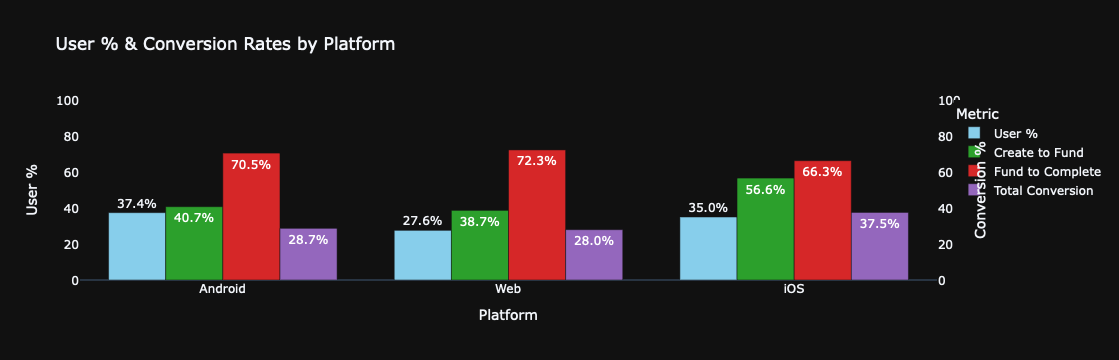

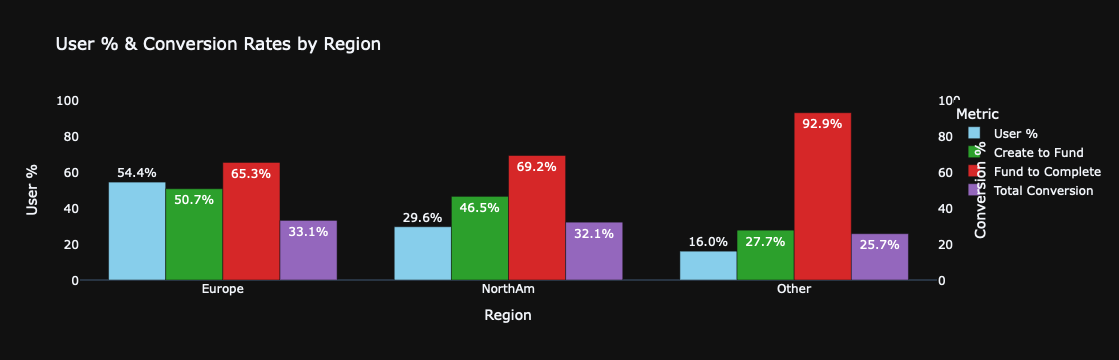

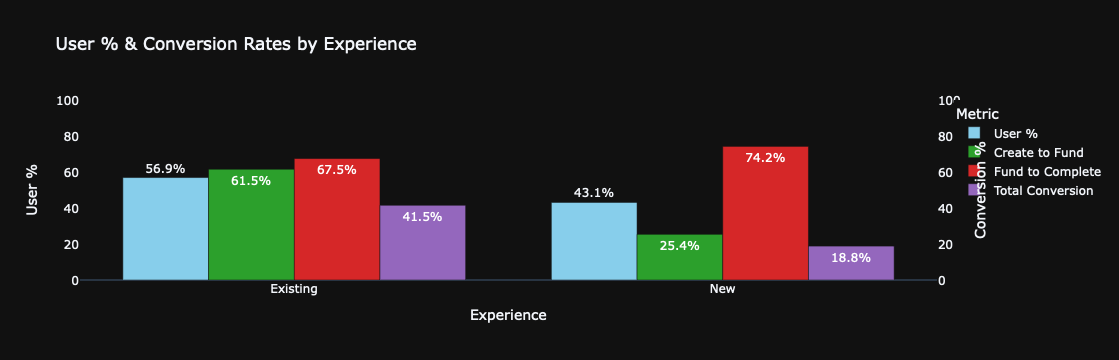

In [214]:


segments = ['platform','region','experience']

for seg in segments:

    seg_stats = df.groupby([seg,'event_name'])['user_id'].nunique().reset_index()
    seg_pivot = seg_stats.pivot_table(index=seg, columns='event_name', values='user_id').reset_index()


    total_users = seg_pivot[['Transfer Created', 'Transfer Funded', 'Transfer Transferred']].sum().max()
    seg_pivot['User_Pct'] = (seg_pivot['Transfer Created'] / total_users) * 100


    if {'Transfer Created', 'Transfer Funded'}.issubset(seg_pivot.columns):
        seg_pivot['Create_to_Fund'] = (seg_pivot['Transfer Funded'] / seg_pivot['Transfer Created']) * 100

    if {'Transfer Funded', 'Transfer Transferred'}.issubset(seg_pivot.columns):
        seg_pivot['Fund_to_Complete'] = (seg_pivot['Transfer Transferred'] / seg_pivot['Transfer Funded']) * 100

    if {'Transfer Created', 'Transfer Transferred'}.issubset(seg_pivot.columns):
        seg_pivot['Total_Conversion'] = (seg_pivot['Transfer Transferred'] / seg_pivot['Transfer Created']) * 100

    conv_cols = ['Create_to_Fund', 'Fund_to_Complete', 'Total_Conversion']
    seg_long = seg_pivot.melt(id_vars=[seg, 'User_Pct'], value_vars=[c for c in conv_cols if c in seg_pivot.columns],
                              var_name='Conversion_Step', value_name='Rate')

    fig = go.Figure()

    colors = ['#2ca02c', '#d62728', '#9467bd'] 

    fig.add_trace(go.Bar(
        x=seg_long[seg].unique(),
        y=seg_pivot['User_Pct'],
        name='User %',
        marker_color='skyblue',
        text=seg_pivot['User_Pct'].round(1).astype(str) + '%',
        textposition='outside',
        yaxis='y1',
        offsetgroup=0
    ))


    for i, step in enumerate(seg_long['Conversion_Step'].unique()):
        df_step = seg_long[seg_long['Conversion_Step'] == step]
        fig.add_trace(go.Bar(
            x=df_step[seg],
            y=df_step['Rate'],
            name=step.replace('_', ' '),
            marker_color=colors[i % len(colors)],
            text=df_step['Rate'].round(1).astype(str) + '%',
            textposition='inside',
            yaxis='y2',
            offsetgroup=i+1
        ))


    fig.update_layout(
        title=f'User % & Conversion Rates by {seg.capitalize()}',
        template='plotly_dark',
        barmode='group',
        xaxis_title=seg.capitalize(),
        yaxis=dict(title='User %', side='left', range=[0,100], showgrid=False),
        yaxis2=dict(title='Conversion %', overlaying='y', side='right', range=[0,100], showgrid=False),
        height=500,
        legend_title_text='Metric'
    )

    fig.show()


#### 12. Conversion Over Time by segments

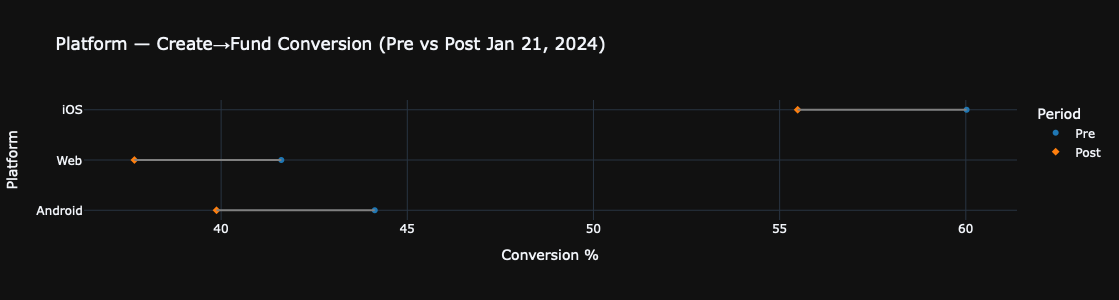

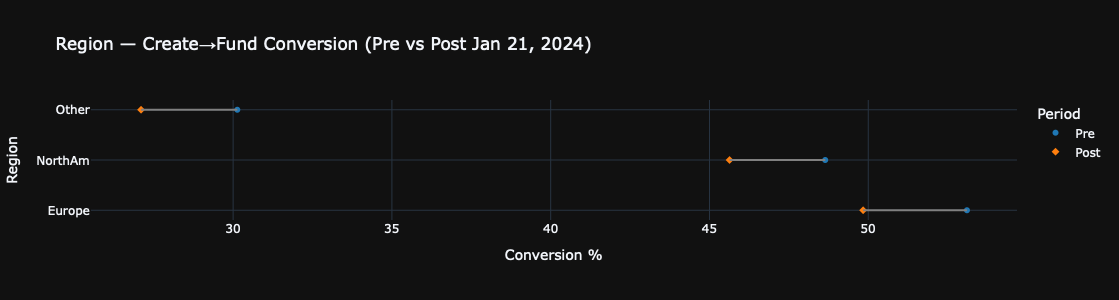

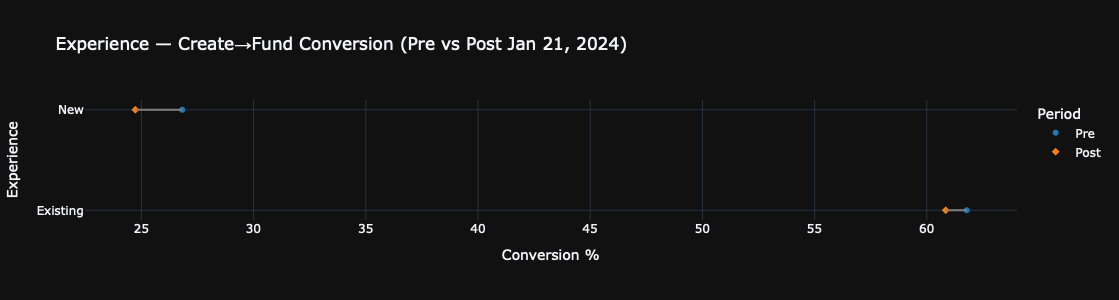

In [215]:


cut_date = '2024-01-14'
for seg in segments:

    df['period'] = np.where(df['week'] < cut_date, 'Pre', 'Post')
    seg_stats = (
        df.groupby([seg, 'period', 'event_name'])['user_id']
        .nunique()
        .reset_index()
        .pivot_table(index=[seg, 'period'], columns='event_name', values='user_id')
        .fillna(0)
        .reset_index()
    )

    seg_stats['Create_to_Fund'] = np.where(
        seg_stats['Transfer Created'] > 0,
        seg_stats['Transfer Funded'] / seg_stats['Transfer Created'] * 100,
        np.nan
    )

 
    conv_pivot = seg_stats.pivot(index=seg, columns='period', values='Create_to_Fund').reset_index()
    conv_melt = conv_pivot.melt(id_vars=seg, value_vars=['Pre', 'Post'], var_name='Period', value_name='Conversion')


    fig = px.scatter(conv_melt, x='Conversion', y=seg, color='Period',
                     symbol='Period', color_discrete_map={'Pre':'#1f77b4','Post':'#ff7f0e'},
                     title=f"{seg.capitalize()} — Create→Fund Conversion (Pre vs Post Jan 21, 2024)")

    for i, row in conv_pivot.iterrows():
        fig.add_shape(
            type="line",
            x0=row['Pre'], x1=row['Post'],
            y0=i, y1=i,
            line=dict(color="gray", width=2)
        )

    fig.update_layout(template='plotly_dark', xaxis_title='Conversion %', yaxis_title=seg.capitalize(),
                      height=300)
    fig.show()


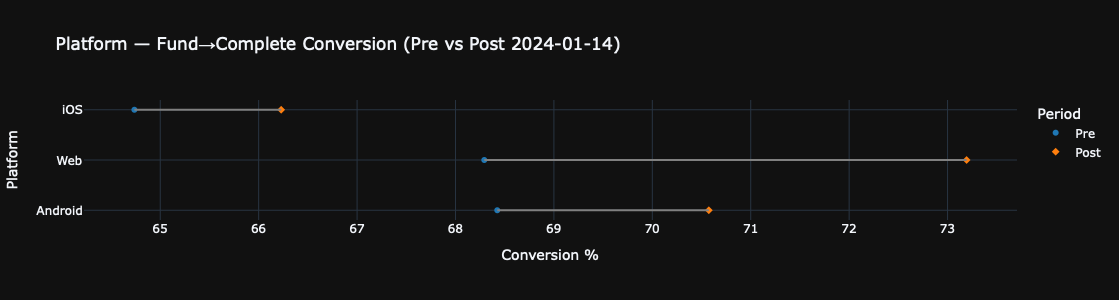

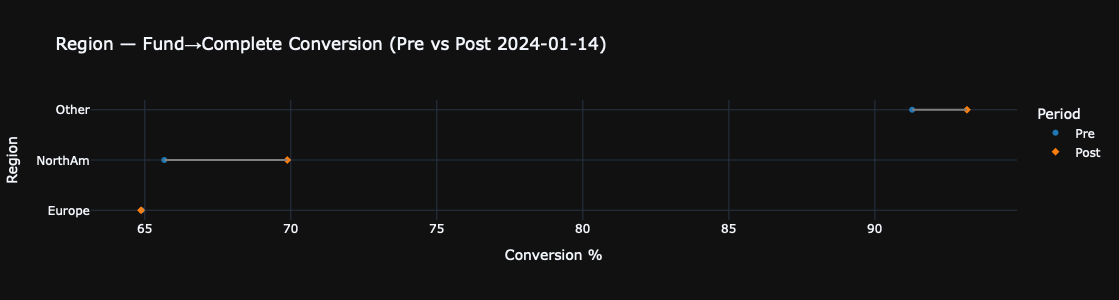

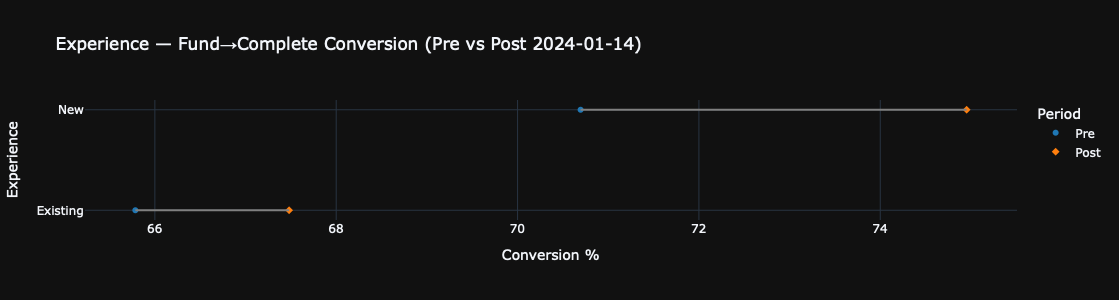

In [110]:

for seg in segments:

    df['period'] = np.where(df['week'] < cut_date, 'Pre', 'Post')

    seg_stats = (
        df.groupby([seg, 'period', 'event_name'])['user_id']
        .nunique()
        .reset_index()
        .pivot_table(index=[seg, 'period'], columns='event_name', values='user_id')
        .fillna(0)
        .reset_index()
    )

    seg_stats['Fund_to_Complete'] = np.where(
        seg_stats['Transfer Funded'] > 0,
        seg_stats['Transfer Transferred'] / seg_stats['Transfer Funded'] * 100,
        np.nan
    )

    conv_pivot = seg_stats.pivot(index=seg, columns='period', values='Fund_to_Complete').reset_index()

    conv_melt = conv_pivot.melt(id_vars=seg, value_vars=['Pre', 'Post'], var_name='Period', value_name='Conversion')

    fig = px.scatter(conv_melt, x='Conversion', y=seg, color='Period',
                     symbol='Period',
                     color_discrete_map={'Pre':'#1f77b4','Post':'#ff7f0e'},
                     title=f"{seg.capitalize()} — Fund→Complete Conversion (Pre vs Post {cut_date})")

    for i, row in conv_pivot.iterrows():
        fig.add_shape(
            type="line",
            x0=row['Pre'], x1=row['Post'],
            y0=i, y1=i,
            line=dict(color="gray", width=2)
        )

    fig.update_layout(
        template='plotly_dark',
        xaxis_title='Conversion %',
        yaxis_title=seg.capitalize(),
        height=300
    )

    fig.show()


![alt text](task_1.png "Title")

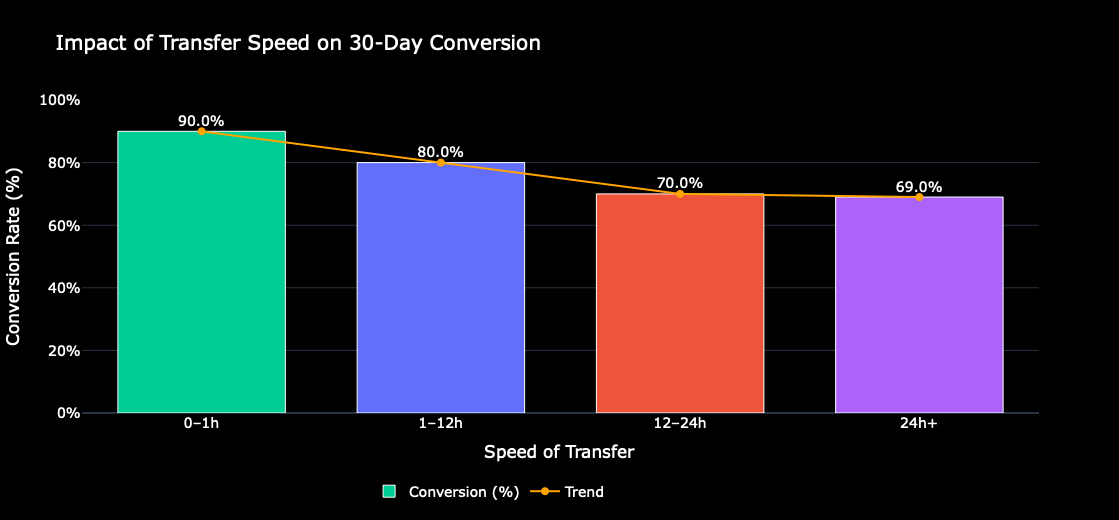

In [246]:

data = {
    "speed_bucket": ["0–1h", "1–12h", "12–24h", "24h+"],
    "conversion_pct": [0.90, 0.80, 0.70, 0.69]  # fractions (0–1)
}
df = pd.DataFrame(data)
df['conversion_pct_label'] = (df['conversion_pct'] * 100).round(1).astype(str) + '%'


fig = go.Figure()


fig.add_trace(go.Bar(
    x=df['speed_bucket'],
    y=df['conversion_pct'] * 100,
    text=df['conversion_pct_label'],
    textposition='outside',
    textfont=dict(color='white', size=14),
    marker=dict(
        color=['#00CC96', '#636EFA', '#EF553B', '#AB63FA'],
        line=dict(color='white', width=1)
    ),
    hovertemplate='Speed: %{x}<br>Conversion: %{y:.1f}%<extra></extra>',
    name='Conversion (%)'
))


fig.add_trace(go.Scatter(
    x=df['speed_bucket'],
    y=df['conversion_pct'] * 100,
    mode='lines+markers',
    line=dict(color='orange', width=2),
    marker=dict(size=8, color='orange'),
    name='Trend'
))


fig.update_layout(
    title='Impact of Transfer Speed on 30-Day Conversion',
    xaxis_title='Speed of Transfer',
    yaxis_title='Conversion Rate (%)',
    template='plotly_dark',
    font=dict(color='white', size=14),
    yaxis=dict(ticksuffix='%', range=[0, 100]),
    plot_bgcolor='black',
    paper_bgcolor='black',
    height=520,
    width=1200,
    hovermode='x unified',
    bargap=0.3,
    title_font=dict(size=20, color='white'),
    legend=dict(orientation='h', y=-0.2, x=0.3)
)

fig.show()


----
## Task 1 Questions:

#### 1.1. How would she interpret these results?

#### 1.2. What conclusions can you infer from this data?

#### 1.3. What would you recommend Angela and the Speed team to do?

----

### <span style="color:red; font-weight:bold">Task 1: Analysis Review — “Understanding the Impact of Speed on Growth”</span>

#### <span style="color:red">1.1 How would she interpret these results?</span>

Angela’s analysis clearly shows a **strong positive relationship between transfer speed and customer retention**. Customers whose transfers complete within 0–1 hour have a **90% likelihood** of making another transfer within 30 days — a notable **21 percentage-point increase** compared to those with 24h+ transfers. This indicates that **faster transfer experiences directly increase the likelihood of repeat usage**, confirming that speed is a key driver of satisfaction and trust.

---

#### <span style="color:red">1.2 What conclusions can you infer from this data?</span>

The results highlight that **speed is a critical growth lever for Wise**. The sharp decline in conversion between the 0–1h and 12–24h buckets suggests that even moderate delays can significantly reduce repeat engagement. Customers clearly expect near-instant transfers; once delays extend beyond 12 hours, the experience deteriorates enough to discourage re-use. Hence, operational efficiency — particularly faster processing — directly influences customer lifetime value (CLV) and platform growth.

---

#### <span style="color:red">1.3 What would you recommend Angela and the Speed Team to do?</span>

Angela and the Speed Team should **focus on shifting transfers from slower (1–24h) buckets to the 0–1h range**, where the retention impact is most pronounced. Conducting a **root-cause analysis** of why transfers fall into slower categories (e.g., corridor-specific issues, payment methods, compliance holds) would help prioritize fixes. Additionally, they should **quantify the business impact of speed improvements** to guide investment in faster payment rails and streamline bottlenecks — ensuring more customers experience the “instant” transfer promise that drives loyalty and growth.

In parallel, they could:

- Segment results by geography and payment flow to prioritize high-impact corridors.
- Run controlled experiments to validate causality and measure conversion uplift.
- Enhance communication for unavoidable slow transfers (e.g., regulatory or compliance delays) to manage user expectations and minimize churn.

Overall, accelerating transfer speed — particularly for mid-range segments — represents a high-ROI opportunity to strengthen retention, improve brand trust, and drive sustainable growth.

---




----
## Task 2 Questions:

#### 2.1. Examine the conversion dynamics – is there any noticeable change? If yes, what is its root cause?

#### 2.2. Are there any anomalies that require the product team’s attention? What could be happening in the customer experience that causes such a metric anomaly?



#### 2.1. Examine the conversion dynamics – is there any noticeable change? If yes, what is its root cause?

---

#### **Proposed Analytical Steps:**

1. **Funnel Analysis** – Map the end-to-end user journey (e.g., Created → Funded → Transferred) to measure stage-wise conversion rates and identify drop-offs.
2. **Trend Analysis (Time Series)** – Visualize weekly or daily conversion trends using line plots to detect shifts or anomalies over time.
3. **Statistical Testing** – Conduct hypothesis tests (e.g., t-tests or proportion z-tests) to verify if observed changes are statistically significant.


---



#### 1. Funnel Analysis

Goal: Quantify drop-offs at each stage and produce a clean funnel + conversion table.

Funnel Metrics:
             event_name  user_count
0      Transfer Created       41510
1       Transfer Funded       19145
2  Transfer Transferred       13250


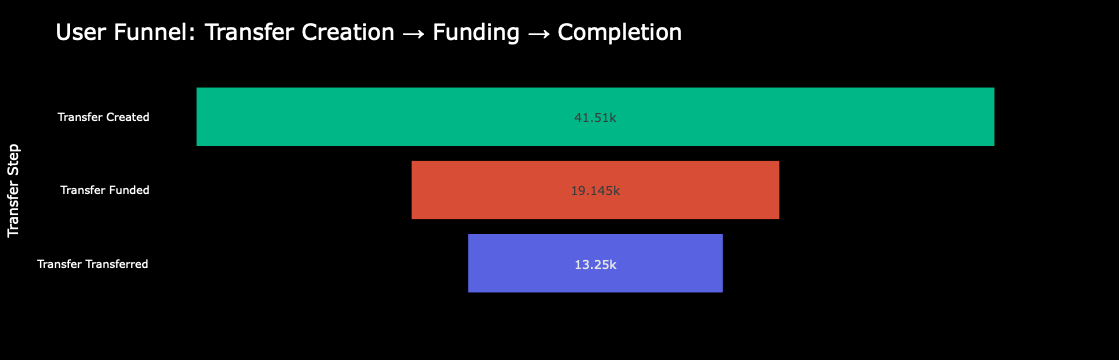


Conversion Rates:
Created → Funded: 46.1%
Funded → Transferred: 69.2%
Overall Conversion: 31.9%


In [182]:
import plotly.express as px
import pandas as pd


def calculate_funnel_progression(df):

    user_journey = df.pivot_table(
        index='user_id',
        columns='event_name',
        values='dt',
        aggfunc='min' 
    ).reset_index()
    
    users_created = user_journey['Transfer Created'].notna().sum()
    users_funded = user_journey['Transfer Funded'].notna().sum()
    users_transferred = user_journey['Transfer Transferred'].notna().sum()
    
    funnel_data = pd.DataFrame({
        'event_name': ['Transfer Created', 'Transfer Funded', 'Transfer Transferred'],
        'user_count': [users_created, users_funded, users_transferred]
    })
    
    return funnel_data

funnel_data = calculate_funnel_progression(df)
print("Funnel Metrics:")
print(funnel_data)

funnel_data = funnel_data[::-1] 


fig_funnel = px.funnel(
    funnel_data,
    x='user_count',
    y='event_name',
    title='User Funnel: Transfer Creation → Funding → Completion',
    labels={'user_count': 'Unique Users', 'event_name': 'Transfer Step'},
    color='event_name'
)


fig_funnel.update_layout(
    template='plotly_dark',
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'),
    title_font=dict(size=22, color='white'),
    height=600,
    margin=dict(t=80, b=60),
    showlegend=False
)

fig_funnel.update_xaxes(showgrid=False, tickfont=dict(color='white', size=10))
fig_funnel.update_yaxes(showgrid=False, tickfont=dict(color='white', size=11))

fig_funnel.update_traces(
    textposition='inside',
    textinfo='value',
    opacity=0.9
)

fig_funnel.show()

if len(funnel_data) == 3:
    created_to_funded = (funnel_data.iloc[1]['user_count'] / funnel_data.iloc[2]['user_count']) * 100
    funded_to_transferred = (funnel_data.iloc[0]['user_count'] / funnel_data.iloc[1]['user_count']) * 100
    overall_conversion = (funnel_data.iloc[0]['user_count'] / funnel_data.iloc[2]['user_count']) * 100
    
    print(f"\nConversion Rates:")
    print(f"Created → Funded: {created_to_funded:.1f}%")
    print(f"Funded → Transferred: {funded_to_transferred:.1f}%")
    print(f"Overall Conversion: {overall_conversion:.1f}%")



---

#### **1. Reading the Funnel**

Each bar represents the **number of unique users** who reached that step:

| Step                        | Users   | % of Previous Step                                    |
| --------------------------- | ------- | ----------------------------------------------------- |
| **Transfer Created**        | 41.51 k | 100 %                                                 |
| **Transfer Funded**         | 19.15 k | **≈ 46 %** of creators funded their transfer          |
| **Transfer Transferred**    | 13.25 k | **≈ 69 %** of funded transfers completed successfully |
| **Total Funnel Conversion** | —       | **≈ 32 %** (13.25 k / 41.51 k) overall completion     |

---

####  **2. Key Takeaways**

* The **largest drop-off** occurs between **Transfer Created → Transfer Funded**, where **more than half of users abandon the flow** before funding.
* The **Funded → Transferred** stage performs well (≈ 70 %), implying that once users fund, the system reliably completes payouts.
* The **overall conversion** (~32 %) is mainly constrained by the early-stage friction.

---

####  **3. Possible Root Causes (for Task 2.1)**

The weak step (Create → Fund) usually indicates:

* **Payment friction** — limited or failing payment methods, timeouts, or unclear fund-in instructions.
* **User hesitation** — users exploring exchange rates but not committing (price-sensitive or comparing alternatives).
* **Platform issues** — check whether this drop is stronger on **mobile vs. web**, or **new vs. existing** users.

---

####  **4. Anomalies to Flag (for Task 2.2)**

* If the Create → Fund conversion has **declined over recent weeks** (as shown in your time-series plot), it’s an **anomaly** requiring product attention.
* Potential triggers:

  * A **UX change** in the payment screen.
  * A **temporary outage** of a major payment provider.
  * A **surge of new users** unfamiliar with the process.

---

####  **5. How You’d Present It in Words**

> “Out of all users who create a transfer, only ~46 % go on to fund it, while 70 % of those funded complete successfully.
> The main drop-off occurs at the funding stage, suggesting friction in the pay-in experience. This is consistent with the downward trend in the weekly Create-to-Fund conversion rate observed from January onward.”

---



#### 2. Trend Analysis

Goal: See how conversion rates evolve; identify when changes began.

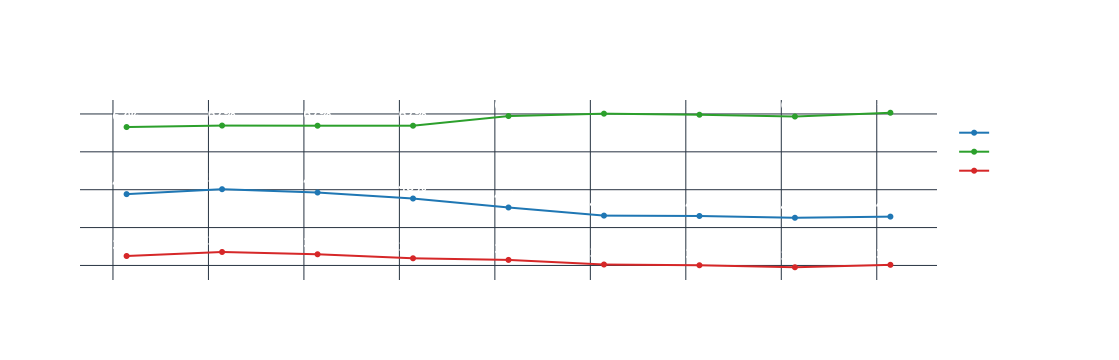

In [272]:

df['week'] = pd.to_datetime(df['dt']).dt.to_period('W').apply(lambda r: r.start_time)

weekly_stats = df.pivot_table(index='week', columns='event_name', values='user_id', aggfunc='nunique').reset_index()

if {'Transfer Created', 'Transfer Funded'}.issubset(weekly_stats.columns):
    weekly_stats['Create_to_Fund_Rate'] = weekly_stats['Transfer Funded'] / weekly_stats['Transfer Created']

if {'Transfer Funded', 'Transfer Transferred'}.issubset(weekly_stats.columns):
    weekly_stats['Fund_to_Complete_Rate'] = weekly_stats['Transfer Transferred'] / weekly_stats['Transfer Funded']

if {'Transfer Created', 'Transfer Transferred'}.issubset(weekly_stats.columns):
    weekly_stats['Total_Conversion_Rate'] = weekly_stats['Transfer Transferred'] / weekly_stats['Transfer Created']

conversion_cols = [col for col in weekly_stats.columns if 'Rate' in col]


if conversion_cols:
    fig_conversion = go.Figure()
    colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd'] 

    for i, col in enumerate(conversion_cols):
        fig_conversion.add_trace(go.Scatter(
            x=weekly_stats['week'], 
            y=weekly_stats[col],
            mode='lines+markers+text',
            name=col.replace('_', ' ').replace('Rate', '').strip(),
            line=dict(width=2, color=colors[i % len(colors)]),
            marker=dict(size=6, symbol='circle'),
            text=weekly_stats[col].apply(lambda x: f"{x:.0%}"), 
            textposition="top center"
        ))

    fig_conversion.update_layout(
        title='Weekly Conversion Rate Trends (Full Funnel)',
        xaxis_title='Week',
        yaxis_title='Conversion Rate',
        yaxis=dict(tickformat=".0%"),
        template='plotly_dark',
        hovermode='x unified',
        legend_title_text='Conversion Funnel',
        font=dict(color='white'),
        title_font=dict(size=18, color='white'),
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='rgba(0,0,0,0)',
        height=600
    )

    fig_conversion.show()



Observations

- Create → Fund Rate (Blue) shows a gradual decline from ~50% in early January to ~42% by late February.
- Fund → Complete Rate (Green) remains stable around 68–70%, suggesting no payout system issues.
- Total Conversion (Red) mirrors the Create → Fund trend, falling from ~33% to ~30% over the same period.

Interpretation (Conversion Dynamics)

- This pattern suggests that the drop in total conversion is driven primarily by the Create → Fund step, not by payout failures.
    Possible root causes include:
    - Friction or errors in the payment setup flow (card or bank selection).
    - UI changes or new payment partner integrations introduced in late January causing temporary confusion.
    - A rise in new users (experience = New) who may abandon the flow before funding.

Anomalies to Flag (For Task 2.2)

- The downward trend in Create → Fund conversion from mid-January looks like a metric anomaly worth investigating.
- Check if it aligns with any feature rollout or payment method outage.
- Break down by platform (Web / iOS / Android) to see if one platform drove the dip.
- Compare New vs Existing user cohorts — if new users dominate, onboarding friction may be the issue.
    

#### 3. Statistical Test

Goal: Test whether the change (pre vs post period) is statistically meaningful.

In [209]:
from scipy.stats import ttest_ind

weekly = df.pivot_table(index='week', columns='event_name', values='user_id', aggfunc='nunique').reset_index()
weekly['create_to_fund'] = weekly['Transfer Funded'] / weekly['Transfer Created']
weekly['fund_to_transferred'] = weekly['Transfer Transferred'] / weekly['Transfer Funded']
weekly['total'] = weekly['Transfer Transferred'] / weekly['Transfer Created']


cut = '2024-01-14'
pre = weekly[weekly['week'] < cut]['create_to_fund'].dropna()
post = weekly[weekly['week'] >= cut]['create_to_fund'].dropna()


print("Hypothesis Test: Comparing 'Create → Fund' Conversion Rates Before and After Jan 21, 2024\n")
print("Null Hypothesis (H₀): Mean conversion rate (pre) = Mean conversion rate (post)")
print("Alternative Hypothesis (H₁): Mean conversion rate (pre) ≠ Mean conversion rate (post)\n")

tt = ttest_ind(pre, post, nan_policy='omit', equal_var=False)
t_stat, p_val = tt.statistic, tt.pvalue


alpha = 0.05

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.6f}")
print(f"Significance level (α): {alpha}")

if p_val < alpha:
    print("\nReject Null Hypothesis (H₀)")
    print("Interpretation: There is a statistically significant difference in 'Create → Fund' between pre and post periods.")
else:
    print("\n Fail to Reject Null Hypothesis (H₀)")
    print("No statistically significant difference in 'Create → Fund' between before and after Jan 21, 2024.")



Hypothesis Test: Comparing 'Create → Fund' Conversion Rates Before and After Jan 21, 2024

Null Hypothesis (H₀): Mean conversion rate (pre) = Mean conversion rate (post)
Alternative Hypothesis (H₁): Mean conversion rate (pre) ≠ Mean conversion rate (post)

t-statistic: 3.8641
p-value: 0.008630
Significance level (α): 0.05

Reject Null Hypothesis (H₀)
Interpretation: There is a statistically significant difference in 'Create → Fund' between pre and post periods.


In [211]:
pre = weekly[weekly['week'] < cut]['fund_to_transferred'].dropna()
post = weekly[weekly['week'] >= cut]['fund_to_transferred'].dropna()

print("Hypothesis Test: Comparing 'Fund → Transferred' Conversion Rates Before and After Jan 21, 2024\n")
print("Null Hypothesis (H₀): Mean conversion rate (pre) = Mean conversion rate (post)")
print("Alternative Hypothesis (H₁): Mean conversion rate (pre) ≠ Mean conversion rate (post)\n")


tt = ttest_ind(pre, post, nan_policy='omit', equal_var=False)
t_stat, p_val = tt.statistic, tt.pvalue

alpha = 0.05

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.6f}")
print(f"Significance level (α): {alpha}")

if p_val < alpha:
    print("\nReject Null Hypothesis (H₀)")
    print("Interpretation: There is a statistically significant difference in 'Fund → Transferred' conversion rates between pre and post periods.")
else:
    print("\nFail to Reject Null Hypothesis (H₀)")
    print("No statistically significant difference in 'Fund → Transferred' conversion rates before and after Jan 21, 2024.")


Hypothesis Test: Comparing 'Fund → Transferred' Conversion Rates Before and After Jan 21, 2024

Null Hypothesis (H₀): Mean conversion rate (pre) = Mean conversion rate (post)
Alternative Hypothesis (H₁): Mean conversion rate (pre) ≠ Mean conversion rate (post)

t-statistic: -3.8150
p-value: 0.006675
Significance level (α): 0.05

Reject Null Hypothesis (H₀)
Interpretation: There is a statistically significant difference in 'Fund → Transferred' conversion rates between pre and post periods.


----
### <span style="color:red; font-weight:bold">Task 2 Questions:</span>

#### <span style="color:red">2.1. Examine the conversion dynamics – is there any noticeable change? If yes, what is its root cause?</span>

#### **Key Insights from Funnel Analysis:**

The funnel shows a strong drop-off between “Transfer Created” and “Transfer Funded” (created to funded rate), with only 46.1 % of created transfers being funded. In contrast, 69.2 % of funded transfers (Funded to transfer rate) complete successfully, giving an overall completion rate of 31.9 %.

This means that the main friction lies in the funding step rather than the actual transfer process. The funding stage accounts for nearly two-thirds of total loss in the funnel (from 41.5 k → 19.1 k → 13.25 k).


##### Root cause (likely drivers)

##### 1. Create to Fund
- __Curious, Not Committed– Users Exploring Without Sending:__
New users often create transfers without finalizing them — many do so merely to check exchange rates, fees, or delivery times, effectively using the transfer flow as a simulation tool rather than completing an actual transaction.
- __Onboarding or Verification Holds:__ KYC / compliance holds — some users might get flagged before funding.
- __Competitive & Market Factors:__ Users often abandon transfers due to better rates from competitors, or bank-related delays/restrictions, which interrupt the transfer flow despite initial intent to send.
- __Process & System Design Issues:__
    - No save & resume: Users can't easily return to complete funding later
    - Lack of reminders: No email/SMS follow-up for abandoned funding
    - Payment timeout: Session expires while user is getting payment details

##### 2. Fund to transfer
- **Payment Rejection:** User's bank or card declined the transaction after initial approval.

-  **Compliance Hold:** The transfer got flagged for fraud or money laundering checks and is stuck.

-  **Insufficient Funds:** The user didn't have enough money in their account when the payment was processed.

-  **User Cancellation:** The user changed their mind and manually canceled after funding.

-  **Technical Failure:** A system glitch or API error with a banking partner prevented the transfer.

---


#### **Key Insights from Weekly Trends:**

-  **"Fund to Complete" is Stable & Strong:** The **Fund to Complete** rate  is consistently high, hovering between **67% and 70%**. This confirms that the back-end process is very reliable. Once a user funds a transfer, it is highly likely to be completed successfully.

-   **"Create to Fund" is the Volatile Problem Area:** The **Create to Fund** rate is not only lower but also shows **significant volatility**, dropping as low as **43%** and peaking at **55%**.
    This indicates that the initial stage of the funnel is unstable and highly sensitive to external factors.

-  **The Overall Conversion is Dragged Down by the First Step:** The **Total Conversion** rate closely mirrors the "Create to Fund" rate. Its performance (ranging from **31% to 38%**) is directly dependent on how well the first step converts.



-  **A Specific Incident Occurred in Early February:**
    *   There was a **sharp, simultaneous drop** in both the "Create to Fund" and "Total Conversion" rates around **February 4th-11th**.
    *   This suggests a specific **root cause event** occurred during this period, such as:
        *   A problematic product update or bug in the funding flow.
        *   Issues with a popular payment method.
        *   Competitor may have launched an aggressive new marketing campaign.
        *   A marketing campaign that attracted low-intent users.

---



#### <span style="color:red">2.2. Are there any anomalies that require the product team's attention? What could be happening in the customer experience that causes such a metric anomaly?</span>


#### **Critical Anomalies Requiring Attention:**

1.  **Early February Performance Collapse:**
    *   **The Anomaly:** The weekly trend data shows a **sharp, simultaneous drop in the "Create to Fund" rate from ~49% to 43% around February 4-11**. This indicates a specific event disrupted the user experience during this period.
    *   **What's Happening to Customers:** Users who created transfers in early February hit unexpected barriers. This could be:
        *   A **technical glitch** in the payment processing system, causing transactions to fail or not proceed.
        *   A **product update or bug** that introduced a confusing step, an error message, or a crash in the funding flow.
        *   A sudden change in **fees or exchange rates** that made the final offer less attractive than the initial quote, causing users to abandon.
        *   A **competitor's campaign** launching at that time, offering better rates and pulling users away before they funded.

2.  **Catastrophic Onboarding for New Users, Especially on Android in Europe:**
    *   **The Anomaly:** The most severe persistent issue is the **2% Create→Fund conversion rate for new users on Android in Europe**. This is an order of magnitude worse than other segments and represents a complete breakdown of the onboarding process.
    *   While **new users have the lowest "Create to Fund" rate**, they often show a **high "Fund to Transfer" rate**. Conversely, **existing users have the highest "Create to Fund" rate**.
    *   **What's Happening to Customers:** New European Android users likely encounter a hard block after creating a transfer, such as a recurring app crash during verification, a critical bug preventing funding options from displaying, or an overly aggressive KYC check that fails silently.

3.  **Systemic Struggle for New Users Across the Board:**
    *   **The Anomaly:** Across all regions and platforms, **new users consistently show significantly lower Create→Fund conversion rates**  compared to existing users.
    *   **What's Happening to Customers:** The journey for new users is filled with friction, likely due to "sticker shock" from final fees, complex KYC requests, unavailable payment methods, or general hesitancy to trust a new service with their money.

4. **Platform-Wide Divergence in Funnel Trends:**
    *   **The Anomaly:** There is a clear and concerning divergence in the funnel trends across all platforms. While the **"Create to Fund" rate has been decreasing over the period for all platforms** (with iOS consistently having the highest conversion among them), the **"Fund to Transfer" rate is showing an increasing trend for all platforms** (with Web being the highest and iOS the lowest).
    *   **What's Happening to Customers:** A recent iOS app update may have introduced bugs, crashes, or issues with payment integrations (like Apple Pay) that are degrading the transfer experience for all users on that platform.

#### **Summary for the Product Team:**

The team should adopt a triage approach:
1.  **URGENT:** Investigate the **root cause of the early February drop** by reviewing system deployments, error logs, and competitive intelligence from that period.
2.  **URGENT:** Fix the complete onboarding breakdown for **new Android users in Europe**.
3.  **HIGH PRIORITY:** Launch initiatives to improve the **new user experience** globally and diagnose the **iOS app regression**.


### END

![title](https://estonianworld.com/wp-content/uploads/2017/06/TransferWise.jpg)
